In [36]:
import pandas as pd  # pyright: ignore[reportMissingImports]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # pyright: ignore[reportMissingModuleSource]
import plotly.express as px  # pyright: ignore[reportMissingImports]
import plotly.graph_objects as go  # pyright: ignore[reportMissingImports]
import plotly.io as pio  # pyright: ignore[reportMissingImports]


In [37]:
df = pd.read_csv('final_data.csv')

df.head()

,ISO_A0,calendar_start_date,dengue_total,region,year,month,quarter,day_of_year,is_rainy_season,month_sin,...,temp_min,temp_max,humidity,pressure,wind_speed,rainfall,temp_optimal,temp_too_cold,temp_too_hot,humidity_high
0,BGD,1980-01-01,4,SEARO,1980,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
1,BGD,1985-01-01,0,SEARO,1985,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
2,BGD,1986-01-01,0,SEARO,1986,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
3,BGD,1987-01-01,0,SEARO,1987,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0
4,BGD,1988-01-01,0,SEARO,1988,1,1,1,0,0.5,...,22.0,22.0,70.0,1013.25,5.0,10.0,1,0,0,0


In [38]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41997 entries, 0 to 41996
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO_A0                           41997 non-null  object 
 1   calendar_start_date              41997 non-null  object 
 2   dengue_total                     41997 non-null  int64  
 3   region                           41997 non-null  object 
 4   year                             41997 non-null  int64  
 5   month                            41997 non-null  int64  
 6   quarter                          41997 non-null  int64  
 7   day_of_year                      41997 non-null  int64  
 8   is_rainy_season                  41997 non-null  int64  
 9   month_sin                        41997 non-null  float64
 10  month_cos                        41997 non-null  float64
 11  day_of_year_sin                  41997 non-null  float64
 12  day_of_year_cos   

# Complete Dengue Outbreak Prediction Pipeline

## Phase 1: Data Loading & Exploration


In [39]:
# Basic data information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
print(f"Rows: {len(df):,}")
print(f"\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")
    
print(f"\nData Types:")
print(df.dtypes.value_counts())


DATASET OVERVIEW
Shape: (41997, 54)

Columns: 54
Rows: 41,997

Missing Values:
No missing values found!

Data Types:
float64    39
int64      12
object      3
Name: count, dtype: int64


In [40]:
# Summary statistics for target variable and key features
print("=" * 60)
print("TARGET VARIABLE: dengue_total")
print("=" * 60)
print(df['dengue_total'].describe())

print("\n" + "=" * 60)
print("KEY FEATURES SUMMARY")
print("=" * 60)
key_features = ['dengue_total', 'temperature', 'humidity', 'rainfall', 
                'cases_lag_7d', 'cases_rolling_mean_7d', 'cases_rolling_mean_30d']
key_features = [f for f in key_features if f in df.columns]
print(df[key_features].describe())


TARGET VARIABLE: dengue_total
count     41997.000000
mean        431.791342
std        3324.628277
min           0.000000
25%           6.000000
50%          24.000000
75%          98.000000
max      174285.000000
Name: dengue_total, dtype: float64

KEY FEATURES SUMMARY
        dengue_total   temperature  humidity     rainfall   cases_lag_7d  \
count   41997.000000  41997.000000   41997.0  41997.00000   41997.000000   
mean      431.791342     26.451961      70.0    140.28252     374.616949   
std      3324.628277      2.600061       0.0    126.13181    3195.595273   
min         0.000000     22.000000      70.0     10.00000       0.000000   
25%         6.000000     24.000000      70.0     20.00000       4.000000   
50%        24.000000     27.000000      70.0     80.00000      21.000000   
75%        98.000000     28.000000      70.0    280.00000      86.000000   
max    174285.000000     30.000000      70.0    350.00000  174285.000000   

       cases_rolling_mean_7d  cases_rolling_

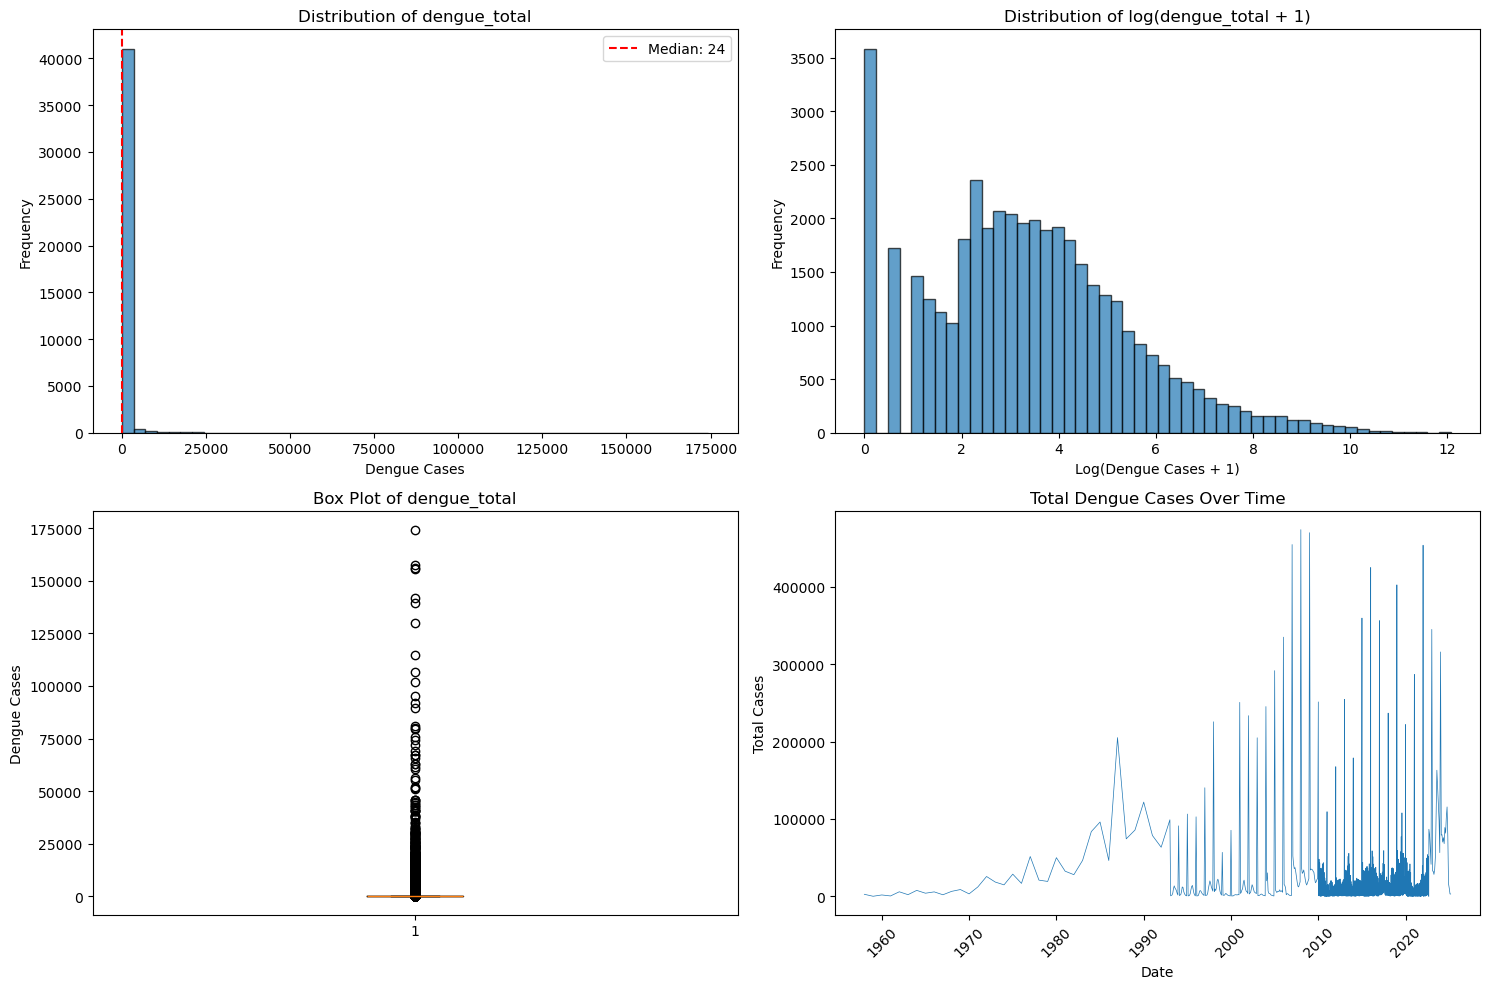

Target Statistics:
  Mean: 431.79
  Median: 24.00
  Std: 3324.63
  Min: 0
  Max: 174285
  Skewness: 25.70


In [41]:
# Convert date column
df['calendar_start_date'] = pd.to_datetime(df['calendar_start_date'])

# Visualize target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['dengue_total'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of dengue_total')
axes[0, 0].set_xlabel('Dengue Cases')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['dengue_total'].median(), color='r', linestyle='--', label=f'Median: {df["dengue_total"].median():.0f}')
axes[0, 0].legend()

# Log transformation
axes[0, 1].hist(np.log1p(df['dengue_total']), bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of log(dengue_total + 1)')
axes[0, 1].set_xlabel('Log(Dengue Cases + 1)')
axes[0, 1].set_ylabel('Frequency')

# Box plot
axes[1, 0].boxplot(df['dengue_total'], vert=True)
axes[1, 0].set_title('Box Plot of dengue_total')
axes[1, 0].set_ylabel('Dengue Cases')

# Time series plot (sample)
df_sample = df.groupby('calendar_start_date')['dengue_total'].sum().reset_index()
df_sample = df_sample.sort_values('calendar_start_date')
axes[1, 1].plot(df_sample['calendar_start_date'], df_sample['dengue_total'], linewidth=0.5)
axes[1, 1].set_title('Total Dengue Cases Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Total Cases')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"Target Statistics:")
print(f"  Mean: {df['dengue_total'].mean():.2f}")
print(f"  Median: {df['dengue_total'].median():.2f}")
print(f"  Std: {df['dengue_total'].std():.2f}")
print(f"  Min: {df['dengue_total'].min()}")
print(f"  Max: {df['dengue_total'].max()}")
print(f"  Skewness: {df['dengue_total'].skew():.2f}")


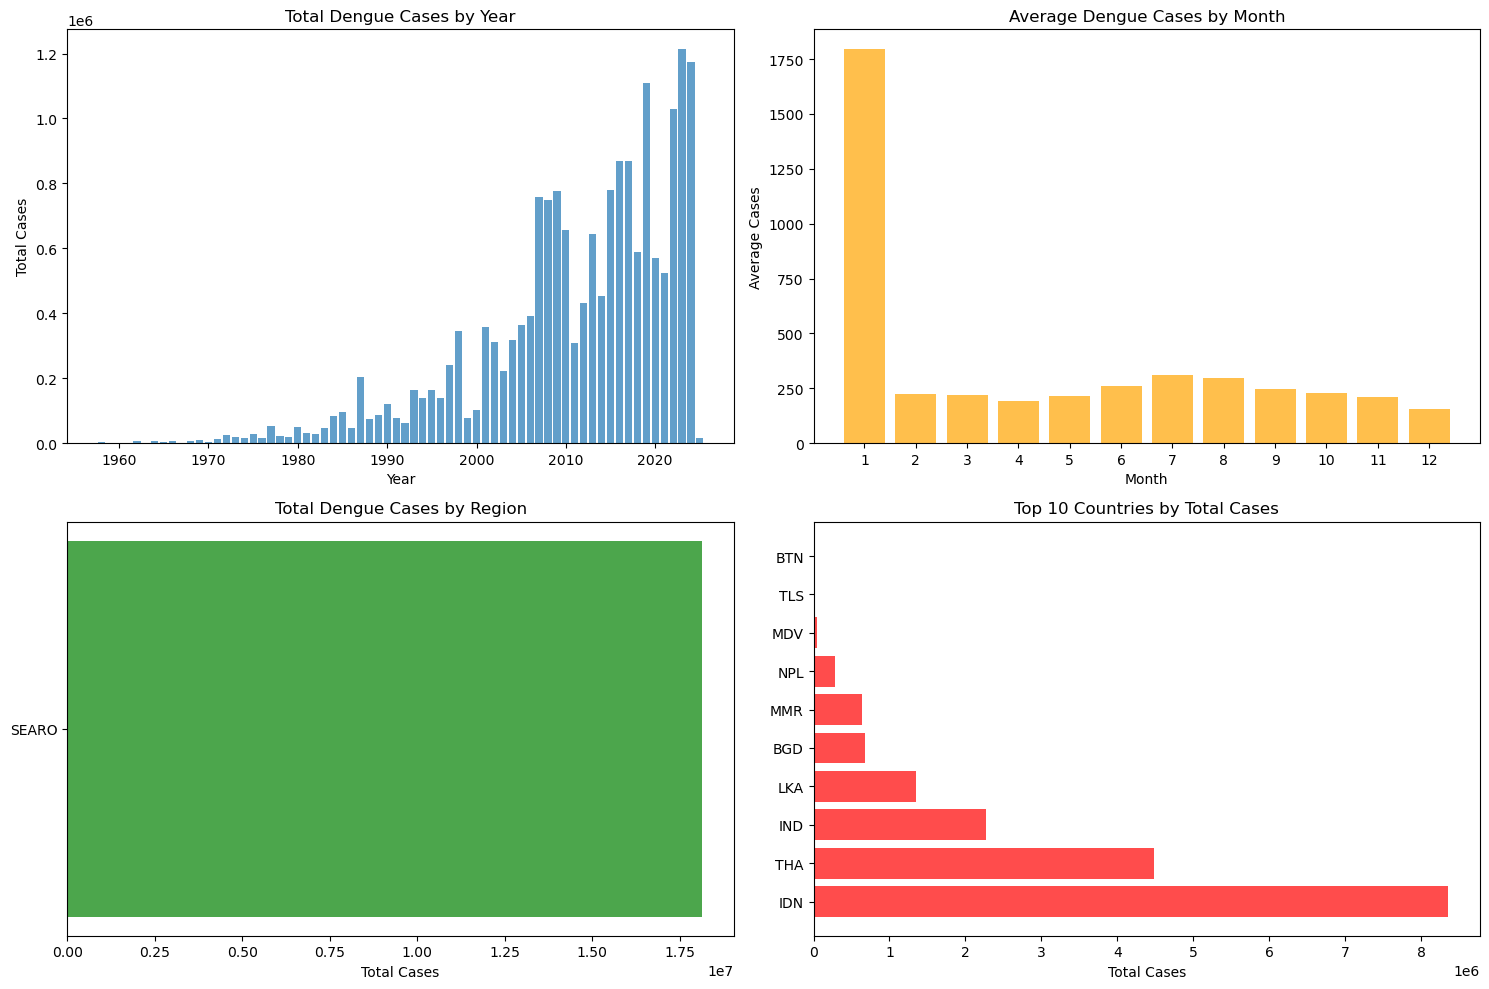

In [42]:
# Explore temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# By year
yearly = df.groupby('year')['dengue_total'].sum().reset_index()
axes[0, 0].bar(yearly['year'], yearly['dengue_total'], alpha=0.7)
axes[0, 0].set_title('Total Dengue Cases by Year')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Cases')

# By month
monthly = df.groupby('month')['dengue_total'].mean().reset_index()
axes[0, 1].bar(monthly['month'], monthly['dengue_total'], alpha=0.7, color='orange')
axes[0, 1].set_title('Average Dengue Cases by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Average Cases')
axes[0, 1].set_xticks(range(1, 13))

# By region
regional = df.groupby('region')['dengue_total'].sum().sort_values(ascending=False).reset_index()
axes[1, 0].barh(regional['region'], regional['dengue_total'], alpha=0.7, color='green')
axes[1, 0].set_title('Total Dengue Cases by Region')
axes[1, 0].set_xlabel('Total Cases')

# By country (ISO_A0)
country = df.groupby('ISO_A0')['dengue_total'].sum().sort_values(ascending=False).head(10).reset_index()
axes[1, 1].barh(country['ISO_A0'], country['dengue_total'], alpha=0.7, color='red')
axes[1, 1].set_title('Top 10 Countries by Total Cases')
axes[1, 1].set_xlabel('Total Cases')

plt.tight_layout()
plt.show()


## Phase 2: Outlier Detection & Handling


In [43]:
from scipy import stats
from sklearn.ensemble import IsolationForest

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude identifier columns
numeric_cols = [col for col in numeric_cols if col not in ['year', 'month', 'quarter', 'day_of_year', 'period_length']]

print("=" * 60)
print("OUTLIER DETECTION")
print("=" * 60)

# Method 1: IQR Method
print("\n1. IQR METHOD")
print("-" * 60)
iqr_outliers = {}
for col in numeric_cols[:10]:  # Check first 10 numeric columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    iqr_outliers[col] = len(outliers)
    if len(outliers) > 0:
        print(f"{col:30s}: {len(outliers):6d} outliers ({len(outliers)/len(df)*100:.2f}%)")

# Focus on target variable
col = 'dengue_total'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
target_outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"\n{'dengue_total':30s}: {len(target_outliers_iqr):6d} outliers ({len(target_outliers_iqr)/len(df)*100:.2f}%)")
print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")


OUTLIER DETECTION

1. IQR METHOD
------------------------------------------------------------
dengue_total                  :   6013 outliers (14.32%)
cases_lag_1d                  :   5990 outliers (14.26%)
cases_lag_7d                  :   5847 outliers (13.92%)
cases_lag_14d                 :   5812 outliers (13.84%)
cases_lag_30d                 :   5888 outliers (14.02%)

dengue_total                  :   6013 outliers (14.32%)
  Q1: 6.00, Q3: 98.00, IQR: 92.00
  Lower bound: -132.00, Upper bound: 236.00


In [44]:
# Method 2: Z-Score Method
print("\n2. Z-SCORE METHOD (|z| > 3)")
print("-" * 60)
z_outliers = {}
for col in numeric_cols[:10]:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = z_scores > 3
    z_outliers[col] = outliers.sum()
    if outliers.sum() > 0:
        print(f"{col:30s}: {outliers.sum():6d} outliers ({outliers.sum()/len(df)*100:.2f}%)")

# Focus on target variable
col = 'dengue_total'
z_scores = np.abs(stats.zscore(df[col]))
target_outliers_z = df[z_scores > 3]
print(f"\n{'dengue_total':30s}: {len(target_outliers_z):6d} outliers ({len(target_outliers_z)/len(df)*100:.2f}%)")



2. Z-SCORE METHOD (|z| > 3)
------------------------------------------------------------
dengue_total                  :    342 outliers (0.81%)
cases_lag_1d                  :    337 outliers (0.80%)
cases_lag_7d                  :    298 outliers (0.71%)
cases_lag_14d                 :    286 outliers (0.68%)
cases_lag_30d                 :    253 outliers (0.60%)

dengue_total                  :    342 outliers (0.81%)


In [45]:
# Method 3: Isolation Forest
print("\n3. ISOLATION FOREST")
print("-" * 60)

# Use key features for isolation forest
key_features_for_if = ['dengue_total', 'temperature', 'humidity', 'rainfall', 
                       'cases_lag_7d', 'cases_rolling_mean_7d']
key_features_for_if = [f for f in key_features_for_if if f in df.columns]

# Prepare data (handle NaN)
df_if = df[key_features_for_if].fillna(0)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_if)
outlier_mask = outlier_labels == -1

print(f"Outliers detected: {outlier_mask.sum()} ({outlier_mask.sum()/len(df)*100:.2f}%)")
print(f"Normal points: {(outlier_labels == 1).sum()} ({(outlier_labels == 1).sum()/len(df)*100:.2f}%)")

# Store results
df['is_outlier_if'] = outlier_mask



3. ISOLATION FOREST
------------------------------------------------------------
Outliers detected: 4200 (10.00%)
Normal points: 37797 (90.00%)


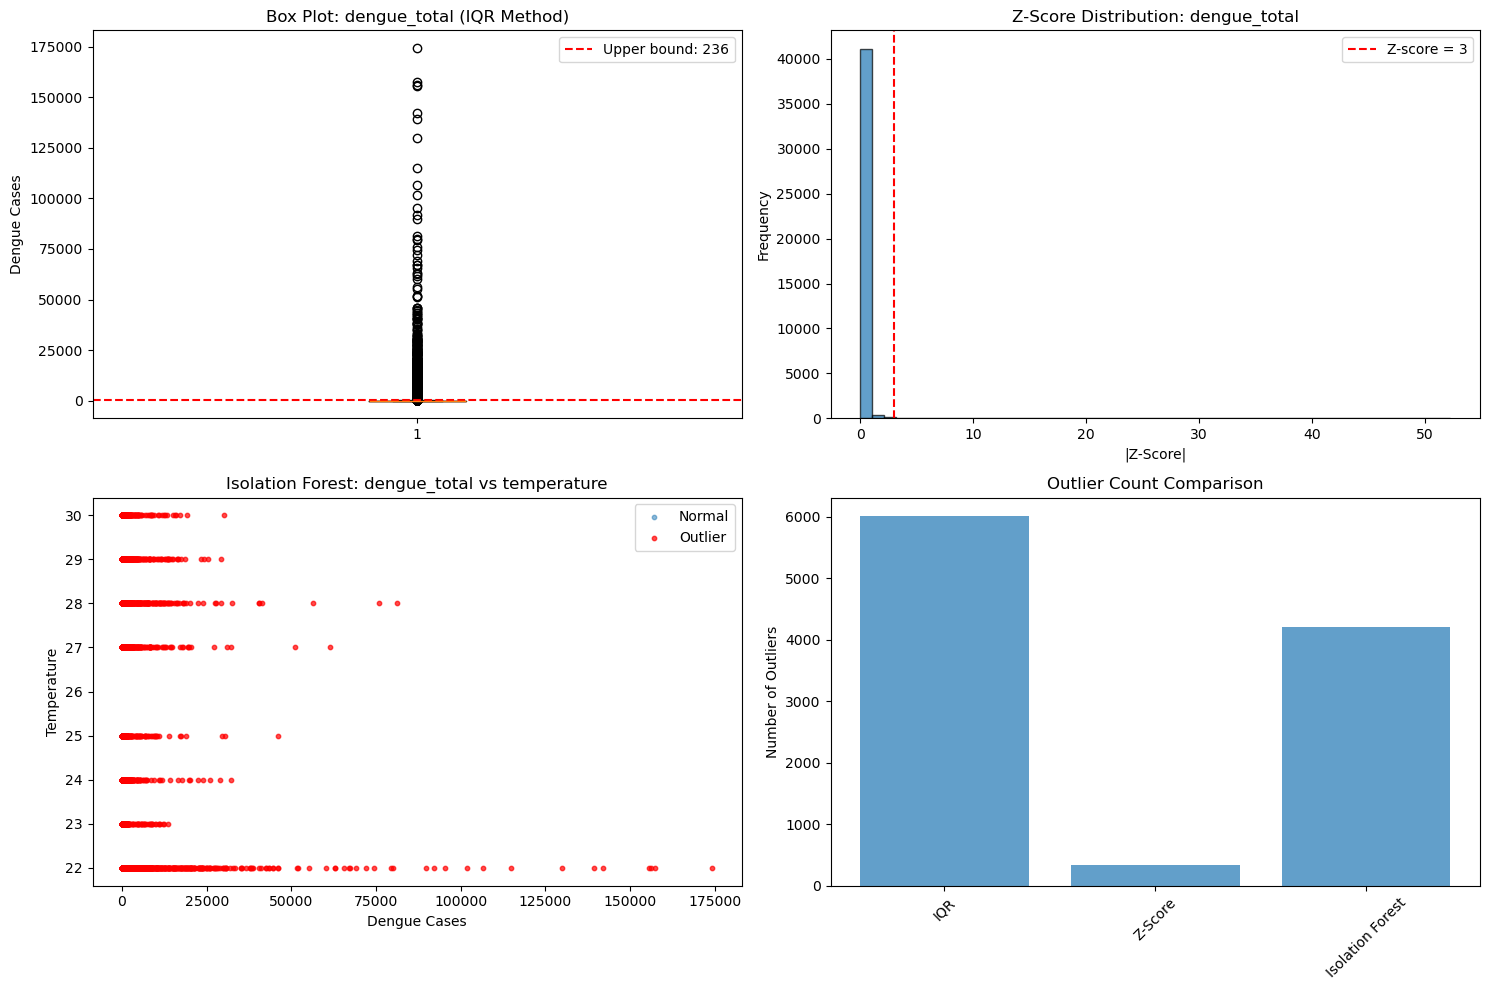

In [46]:
# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# IQR outliers for target
col = 'dengue_total'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

axes[0, 0].boxplot(df[col], vert=True)
axes[0, 0].axhline(upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.0f}')
axes[0, 0].set_title('Box Plot: dengue_total (IQR Method)')
axes[0, 0].set_ylabel('Dengue Cases')
axes[0, 0].legend()

# Z-score outliers
z_scores = np.abs(stats.zscore(df[col]))
axes[0, 1].hist(z_scores, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(3, color='r', linestyle='--', label='Z-score = 3')
axes[0, 1].set_title('Z-Score Distribution: dengue_total')
axes[0, 1].set_xlabel('|Z-Score|')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Isolation Forest results
axes[1, 0].scatter(df[~outlier_mask]['dengue_total'], 
                   df[~outlier_mask]['temperature'], 
                   alpha=0.5, label='Normal', s=10)
axes[1, 0].scatter(df[outlier_mask]['dengue_total'], 
                   df[outlier_mask]['temperature'], 
                   alpha=0.7, label='Outlier', s=10, color='red')
axes[1, 0].set_title('Isolation Forest: dengue_total vs temperature')
axes[1, 0].set_xlabel('Dengue Cases')
axes[1, 0].set_ylabel('Temperature')
axes[1, 0].legend()

# Outlier comparison
outlier_counts = {
    'IQR': len(target_outliers_iqr),
    'Z-Score': len(target_outliers_z),
    'Isolation Forest': outlier_mask.sum()
}
axes[1, 1].bar(outlier_counts.keys(), outlier_counts.values(), alpha=0.7)
axes[1, 1].set_title('Outlier Count Comparison')
axes[1, 1].set_ylabel('Number of Outliers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [47]:
# Outlier Handling Strategies
print("=" * 60)
print("OUTLIER HANDLING STRATEGIES")
print("=" * 60)

# Create copies for different handling strategies
df_original = df.copy()
df_winsorized = df.copy()
df_log_transformed = df.copy()
df_removed = df.copy()

# Strategy 1: Winsorization (Capping at 1st and 99th percentiles)
print("\n1. WINSORIZATION (Capping at 1st and 99th percentiles)")
print("-" * 60)
for col in numeric_cols[:10]:
    if col in df_winsorized.columns:
        lower_percentile = df_winsorized[col].quantile(0.01)
        upper_percentile = df_winsorized[col].quantile(0.99)
        df_winsorized[col] = df_winsorized[col].clip(lower=lower_percentile, upper=upper_percentile)

col = 'dengue_total'
lower_percentile = df_winsorized[col].quantile(0.01)
upper_percentile = df_winsorized[col].quantile(0.99)
df_winsorized[col] = df_winsorized[col].clip(lower=lower_percentile, upper=upper_percentile)
print(f"  Capped {col} between {lower_percentile:.2f} and {upper_percentile:.2f}")

# Strategy 2: Log Transformation
print("\n2. LOG TRANSFORMATION")
print("-" * 60)
for col in ['dengue_total', 'cases_lag_7d', 'cases_rolling_mean_7d', 'rainfall']:
    if col in df_log_transformed.columns:
        df_log_transformed[f'{col}_log'] = np.log1p(df_log_transformed[col])
        print(f"  Created {col}_log")

# Strategy 3: Remove extreme outliers (only Isolation Forest outliers)
print("\n3. REMOVAL (Isolation Forest outliers only)")
print("-" * 60)
df_removed = df_removed[~df_removed['is_outlier_if']].copy()
print(f"  Removed {outlier_mask.sum()} rows ({outlier_mask.sum()/len(df)*100:.2f}%)")

print("\n" + "=" * 60)
print("DATASET SIZES AFTER HANDLING")
print("=" * 60)
print(f"Original:        {len(df_original):,} rows")
print(f"Winsorized:      {len(df_winsorized):,} rows")
print(f"Log Transformed: {len(df_log_transformed):,} rows")
print(f"Outliers Removed: {len(df_removed):,} rows")

# Use winsorized dataset for further analysis (preserves all data points)
df = df_winsorized.copy()
print(f"\n✓ Using winsorized dataset for model training")


OUTLIER HANDLING STRATEGIES

1. WINSORIZATION (Capping at 1st and 99th percentiles)
------------------------------------------------------------
  Capped dengue_total between 0.00 and 8578.01

2. LOG TRANSFORMATION
------------------------------------------------------------
  Created dengue_total_log
  Created cases_lag_7d_log
  Created cases_rolling_mean_7d_log
  Created rainfall_log

3. REMOVAL (Isolation Forest outliers only)
------------------------------------------------------------
  Removed 4200 rows (10.00%)

DATASET SIZES AFTER HANDLING
Original:        41,997 rows
Winsorized:      41,997 rows
Log Transformed: 41,997 rows
Outliers Removed: 37,797 rows

✓ Using winsorized dataset for model training


## Phase 3: Data Preprocessing


In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

print("=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Separate features and target
target_col = 'dengue_total'
feature_cols = [col for col in df.columns if col not in [
    'ISO_A0', 'calendar_start_date', target_col, 'region', 'is_outlier_if'
]]

# Identify categorical and numeric features
categorical_cols = ['ISO_A0', 'region']
numeric_cols = [col for col in feature_cols if col not in categorical_cols]

print(f"\nTarget variable: {target_col}")
print(f"Total features: {len(feature_cols)}")
print(f"  - Numeric features: {len(numeric_cols)}")
print(f"  - Categorical features: {len(categorical_cols)}")

# Encode categorical variables
print("\n1. Encoding Categorical Variables")
print("-" * 60)
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"  Encoded {col}: {df[col].nunique()} unique values")

# Update feature columns to include encoded categoricals
feature_cols = numeric_cols + [f'{col}_encoded' for col in categorical_cols if col in df.columns]

# Prepare X and y
X = df[feature_cols].fillna(0)
y = df[target_col].values

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


DATA PREPROCESSING

Target variable: dengue_total
Total features: 50
  - Numeric features: 50
  - Categorical features: 2

1. Encoding Categorical Variables
------------------------------------------------------------
  Encoded ISO_A0: 10 unique values
  Encoded region: 1 unique values

Final feature matrix shape: (41997, 52)
Target vector shape: (41997,)


In [49]:
# Time-series aware data splitting
print("\n2. Time-Series Aware Data Splitting")
print("-" * 60)

# Sort by date to maintain temporal order
df_sorted = df.sort_values('calendar_start_date').reset_index(drop=True)
X_sorted = df_sorted[feature_cols].fillna(0)
y_sorted = df_sorted[target_col].values

# Split: 70% train, 15% validation, 15% test
train_size = 0.70
val_size = 0.15
test_size = 0.15

n_total = len(X_sorted)
n_train = int(n_total * train_size)
n_val = int(n_total * val_size)

X_train = X_sorted[:n_train]
y_train = y_sorted[:n_train]
X_val = X_sorted[n_train:n_train+n_val]
y_val = y_sorted[n_train:n_train+n_val]
X_test = X_sorted[n_train+n_val:]
y_test = y_sorted[n_train+n_val:]

print(f"Train set:   {len(X_train):,} samples ({len(X_train)/n_total*100:.1f}%)")
print(f"Val set:     {len(X_val):,} samples ({len(X_val)/n_total*100:.1f}%)")
print(f"Test set:    {len(X_test):,} samples ({len(X_test)/n_total*100:.1f}%)")
print(f"\nTrain date range: {df_sorted.iloc[0]['calendar_start_date']} to {df_sorted.iloc[n_train-1]['calendar_start_date']}")
print(f"Val date range:   {df_sorted.iloc[n_train]['calendar_start_date']} to {df_sorted.iloc[n_train+n_val-1]['calendar_start_date']}")
print(f"Test date range:  {df_sorted.iloc[n_train+n_val]['calendar_start_date']} to {df_sorted.iloc[-1]['calendar_start_date']}")



2. Time-Series Aware Data Splitting
------------------------------------------------------------
Train set:   29,397 samples (70.0%)
Val set:     6,299 samples (15.0%)
Test set:    6,301 samples (15.0%)

Train date range: 1958-01-01 00:00:00 to 2017-02-01 00:00:00
Val date range:   2017-02-01 00:00:00 to 2021-04-01 00:00:00
Test date range:  2021-04-01 00:00:00 to 2025-03-01 00:00:00


In [50]:
# Check for infinite values and handle them
print("\n3. Checking for Infinite/Extreme Values")
print("-" * 60)

# Check for infinite values in DataFrames
inf_count_train = np.isinf(X_train.select_dtypes(include=[np.number])).sum().sum()
inf_count_val = np.isinf(X_val.select_dtypes(include=[np.number])).sum().sum()
inf_count_test = np.isinf(X_test.select_dtypes(include=[np.number])).sum().sum()

if inf_count_train > 0 or inf_count_val > 0 or inf_count_test > 0:
    print(f"⚠ Found infinite values: Train={inf_count_train}, Val={inf_count_val}, Test={inf_count_test}")
    print("  Handling them...")
    # Replace infinite values with NaN first, then fill with 0
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_val = X_val.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)
    
    # Fill NaN with 0
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)
    X_test = X_test.fillna(0)
    print("✓ Replaced infinite values with 0")
else:
    print("✓ No infinite values found")

# Check for very large values that might cause issues
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    max_abs_train = X_train[numeric_cols].abs().max().max()
    max_abs_val = X_val[numeric_cols].abs().max().max()
    max_abs_test = X_test[numeric_cols].abs().max().max()
    
    if max_abs_train > 1e10 or max_abs_val > 1e10 or max_abs_test > 1e10:
        print(f"⚠ Found very large values (max: {max(max_abs_train, max_abs_val, max_abs_test):.2e}). Capping...")
        # Cap extreme values at 99.9th percentile for each column
        for col in numeric_cols:
            upper_limit = X_train[col].quantile(0.999)
            lower_limit = X_train[col].quantile(0.001)
            if not np.isnan(upper_limit) and not np.isnan(lower_limit):
                X_train[col] = X_train[col].clip(lower=lower_limit, upper=upper_limit)
                X_val[col] = X_val[col].clip(lower=lower_limit, upper=upper_limit)
                X_test[col] = X_test[col].clip(lower=lower_limit, upper=upper_limit)
        print("✓ Capped extreme values")
    else:
        print("✓ No extreme values found")

# Convert to numpy arrays for scaling
X_train = X_train.values.astype(np.float64)
X_val = X_val.values.astype(np.float64)
X_test = X_test.values.astype(np.float64)

# Feature Scaling
print("\n4. Feature Scaling (StandardScaler)")
print("-" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0)[:5]}")

# Verify no infinite values after scaling
if np.isinf(X_train_scaled).any() or np.isinf(X_val_scaled).any() or np.isinf(X_test_scaled).any():
    print("⚠ Warning: Still found infinite values after scaling!")
    X_train_scaled = np.nan_to_num(X_train_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    X_val_scaled = np.nan_to_num(X_val_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    X_test_scaled = np.nan_to_num(X_test_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    print("✓ Cleaned infinite values after scaling")

# Store for later use
X_train_final = X_train_scaled
X_val_final = X_val_scaled
X_test_final = X_test_scaled

print("\n✓ Preprocessing complete!")



3. Checking for Infinite/Extreme Values
------------------------------------------------------------
⚠ Found infinite values: Train=869, Val=100, Test=451
  Handling them...
✓ Replaced infinite values with 0
✓ No extreme values found

4. Feature Scaling (StandardScaler)
------------------------------------------------------------
Scaled training features shape: (29397, 52)
Mean of scaled features (should be ~0): [ 8.53898485e-15 -3.09383509e-17 -7.05781130e-17  9.76491701e-17
 -7.34785834e-17]
Std of scaled features (should be ~1): [1. 1. 1. 1. 1.]

✓ Preprocessing complete!


## Phase 4: Model Training - Traditional ML


In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("BASELINE MODELS TRAINING")
print("=" * 60)

# Dictionary to store models and results
models = {}
results = {}

# Helper function to calculate metrics
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1))) * 100  # +1 to avoid division by zero
    r2 = r2_score(y_true, y_pred)
    median_ae = np.median(np.abs(y_true - y_pred))
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2,
        'Median_AE': median_ae
    }


BASELINE MODELS TRAINING


In [52]:
# Model 1: Linear Regression
print("\n1. Linear Regression")
print("-" * 60)
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
y_train_pred_lr = lr_model.predict(X_train_final)
y_val_pred_lr = lr_model.predict(X_val_final)

models['Linear Regression'] = lr_model
results['Linear Regression'] = {
    'train': calculate_metrics(y_train, y_train_pred_lr, 'Linear Regression'),
    'val': calculate_metrics(y_val, y_val_pred_lr, 'Linear Regression')
}

print(f"Train - MAE: {results['Linear Regression']['train']['MAE']:.2f}, RMSE: {results['Linear Regression']['train']['RMSE']:.2f}, R²: {results['Linear Regression']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['Linear Regression']['val']['MAE']:.2f}, RMSE: {results['Linear Regression']['val']['RMSE']:.2f}, R²: {results['Linear Regression']['val']['R2']:.4f}")



1. Linear Regression
------------------------------------------------------------
Train - MAE: 134.00, RMSE: 440.68, R²: 0.8006
Val   - MAE: 229.96, RMSE: 768.37, R²: 0.6263


In [53]:
# Model 2: Ridge Regression
print("\n2. Ridge Regression")
print("-" * 60)
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_final, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_final)
y_val_pred_ridge = ridge_model.predict(X_val_final)

models['Ridge Regression'] = ridge_model
results['Ridge Regression'] = {
    'train': calculate_metrics(y_train, y_train_pred_ridge, 'Ridge Regression'),
    'val': calculate_metrics(y_val, y_val_pred_ridge, 'Ridge Regression')
}

print(f"Train - MAE: {results['Ridge Regression']['train']['MAE']:.2f}, RMSE: {results['Ridge Regression']['train']['RMSE']:.2f}, R²: {results['Ridge Regression']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['Ridge Regression']['val']['MAE']:.2f}, RMSE: {results['Ridge Regression']['val']['RMSE']:.2f}, R²: {results['Ridge Regression']['val']['R2']:.4f}")



2. Ridge Regression
------------------------------------------------------------
Train - MAE: 133.83, RMSE: 440.68, R²: 0.8006
Val   - MAE: 229.55, RMSE: 767.48, R²: 0.6272


In [54]:
# Model 3: Random Forest
print("\n3. Random Forest")
print("-" * 60)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(X_train_final, y_train)
y_train_pred_rf = rf_model.predict(X_train_final)
y_val_pred_rf = rf_model.predict(X_val_final)

models['Random Forest'] = rf_model
results['Random Forest'] = {
    'train': calculate_metrics(y_train, y_train_pred_rf, 'Random Forest'),
    'val': calculate_metrics(y_val, y_val_pred_rf, 'Random Forest')
}

print(f"Train - MAE: {results['Random Forest']['train']['MAE']:.2f}, RMSE: {results['Random Forest']['train']['RMSE']:.2f}, R²: {results['Random Forest']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['Random Forest']['val']['MAE']:.2f}, RMSE: {results['Random Forest']['val']['RMSE']:.2f}, R²: {results['Random Forest']['val']['R2']:.4f}")



3. Random Forest
------------------------------------------------------------
Train - MAE: 2.86, RMSE: 25.16, R²: 0.9994
Val   - MAE: 47.27, RMSE: 264.71, R²: 0.9556


In [55]:
# Model 4: XGBoost
print("\n4. XGBoost")
print("-" * 60)
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)
xgb_model.fit(X_train_final, y_train)
y_train_pred_xgb = xgb_model.predict(X_train_final)
y_val_pred_xgb = xgb_model.predict(X_val_final)

models['XGBoost'] = xgb_model
results['XGBoost'] = {
    'train': calculate_metrics(y_train, y_train_pred_xgb, 'XGBoost'),
    'val': calculate_metrics(y_val, y_val_pred_xgb, 'XGBoost')
}

print(f"Train - MAE: {results['XGBoost']['train']['MAE']:.2f}, RMSE: {results['XGBoost']['train']['RMSE']:.2f}, R²: {results['XGBoost']['train']['R2']:.4f}")
print(f"Val   - MAE: {results['XGBoost']['val']['MAE']:.2f}, RMSE: {results['XGBoost']['val']['RMSE']:.2f}, R²: {results['XGBoost']['val']['R2']:.4f}")



4. XGBoost
------------------------------------------------------------
Train - MAE: 4.87, RMSE: 15.11, R²: 0.9998
Val   - MAE: 53.89, RMSE: 276.29, R²: 0.9517


In [56]:
# Summary of baseline models
print("\n" + "=" * 60)
print("BASELINE MODELS SUMMARY (Validation Set)")
print("=" * 60)
print(f"{'Model':<20} {'MAE':<12} {'RMSE':<12} {'MAPE':<12} {'R²':<10}")
print("-" * 60)
for model_name in results.keys():
    val_metrics = results[model_name]['val']
    print(f"{model_name:<20} {val_metrics['MAE']:<12.2f} {val_metrics['RMSE']:<12.2f} {val_metrics['MAPE']:<12.2f} {val_metrics['R2']:<10.4f}")

# Find best baseline model
best_baseline = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
print(f"\n✓ Best baseline model (lowest MAE): {best_baseline}")
print(f"  Validation MAE: {results[best_baseline]['val']['MAE']:.2f}")
print(f"  Validation RMSE: {results[best_baseline]['val']['RMSE']:.2f}")
print(f"  Validation R²: {results[best_baseline]['val']['R2']:.4f}")



BASELINE MODELS SUMMARY (Validation Set)
Model                MAE          RMSE         MAPE         R²        
------------------------------------------------------------
Linear Regression    229.96       768.37       677.15       0.6263    
Ridge Regression     229.55       767.48       674.16       0.6272    
Random Forest        47.27        264.71       3.83         0.9556    
XGBoost              53.89        276.29       16.62        0.9517    

✓ Best baseline model (lowest MAE): Random Forest
  Validation MAE: 47.27
  Validation RMSE: 264.71
  Validation R²: 0.9556


## Phase 5: Pretrained Models & Transfer Learning


In [57]:
# Try to import Prophet (Facebook's time-series forecasting)
try:
    from prophet import Prophet
    PROPHET_AVAILABLE = True
except ImportError:
    PROPHET_AVAILABLE = False
    print("Prophet not available. Install with: pip install prophet")

# Try to import AutoARIMA
try:
    from pmdarima import auto_arima
    AUTO_ARIMA_AVAILABLE = True
except ImportError:
    AUTO_ARIMA_AVAILABLE = False
    print("pmdarima not available. Install with: pip install pmdarima")

print("=" * 60)
print("PRETRAINED TIME-SERIES MODELS")
print("=" * 60)


Prophet not available. Install with: pip install prophet
pmdarima not available. Install with: pip install pmdarima
PRETRAINED TIME-SERIES MODELS


In [58]:
# Prepare data for time-series models (aggregate by date)
print("\n1. Preparing Time-Series Data")
print("-" * 60)

# Aggregate by date for Prophet/AutoARIMA
ts_data = df_sorted.groupby('calendar_start_date')['dengue_total'].sum().reset_index()
ts_data.columns = ['ds', 'y']  # Prophet expects 'ds' and 'y'
ts_data = ts_data.sort_values('ds').reset_index(drop=True)

# Split time-series data
n_ts_total = len(ts_data)
n_ts_train = int(n_ts_total * train_size)
n_ts_val = int(n_ts_total * val_size)

ts_train = ts_data[:n_ts_train].copy()
ts_val = ts_data[n_ts_train:n_ts_train+n_ts_val].copy()
ts_test = ts_data[n_ts_train+n_ts_val:].copy()

print(f"Time-series train: {len(ts_train):,} dates")
print(f"Time-series val:   {len(ts_val):,} dates")
print(f"Time-series test:  {len(ts_test):,} dates")



1. Preparing Time-Series Data
------------------------------------------------------------
Time-series train: 729 dates
Time-series val:   156 dates
Time-series test:  157 dates


In [59]:
# Model 5: Prophet (if available)
if PROPHET_AVAILABLE:
    print("\n2. Prophet Model")
    print("-" * 60)
    try:
        prophet_model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False,
            seasonality_mode='multiplicative'
        )
        prophet_model.fit(ts_train)
        
        # Make predictions
        future_train = prophet_model.make_future_dataframe(periods=0)
        forecast_train = prophet_model.predict(future_train)
        y_train_pred_prophet = forecast_train['yhat'].values[:len(ts_train)]
        
        future_val = prophet_model.make_future_dataframe(periods=len(ts_val))
        forecast_val = prophet_model.predict(future_val)
        y_val_pred_prophet = forecast_val['yhat'].values[-len(ts_val):]
        
        # Align with validation set (aggregate predictions)
        # Since we aggregated by date, we need to map back
        # For simplicity, use the aggregated predictions
        y_val_prophet_aligned = np.repeat(y_val_pred_prophet, len(y_val) // len(y_val_pred_prophet) + 1)[:len(y_val)]
        y_train_prophet_aligned = np.repeat(y_train_pred_prophet, len(y_train) // len(y_train_pred_prophet) + 1)[:len(y_train)]
        
        models['Prophet'] = prophet_model
        results['Prophet'] = {
            'train': calculate_metrics(y_train, y_train_prophet_aligned, 'Prophet'),
            'val': calculate_metrics(y_val, y_val_prophet_aligned, 'Prophet')
        }
        
        print(f"Train - MAE: {results['Prophet']['train']['MAE']:.2f}, RMSE: {results['Prophet']['train']['RMSE']:.2f}, R²: {results['Prophet']['train']['R2']:.4f}")
        print(f"Val   - MAE: {results['Prophet']['val']['MAE']:.2f}, RMSE: {results['Prophet']['val']['RMSE']:.2f}, R²: {results['Prophet']['val']['R2']:.4f}")
    except Exception as e:
        print(f"Error training Prophet: {e}")
        PROPHET_AVAILABLE = False
else:
    print("\n2. Prophet Model - Skipped (not available)")



2. Prophet Model - Skipped (not available)


In [60]:
# Model 6: AutoARIMA (if available)
if AUTO_ARIMA_AVAILABLE:
    print("\n3. AutoARIMA Model")
    print("-" * 60)
    try:
        # Train on aggregated time series
        auto_arima_model = auto_arima(
            ts_train['y'],
            seasonal=True,
            m=12,  # Monthly seasonality
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            max_order=5
        )
        
        # Make predictions
        y_train_pred_arima = auto_arima_model.predict_in_sample()
        y_val_pred_arima = auto_arima_model.predict(n_periods=len(ts_val))
        
        # Align with validation set
        y_val_arima_aligned = np.repeat(y_val_pred_arima, len(y_val) // len(y_val_pred_arima) + 1)[:len(y_val)]
        y_train_arima_aligned = np.repeat(y_train_pred_arima, len(y_train) // len(y_train_pred_arima) + 1)[:len(y_train)]
        
        models['AutoARIMA'] = auto_arima_model
        results['AutoARIMA'] = {
            'train': calculate_metrics(y_train, y_train_arima_aligned, 'AutoARIMA'),
            'val': calculate_metrics(y_val, y_val_arima_aligned, 'AutoARIMA')
        }
        
        print(f"Train - MAE: {results['AutoARIMA']['train']['MAE']:.2f}, RMSE: {results['AutoARIMA']['train']['RMSE']:.2f}, R²: {results['AutoARIMA']['train']['R2']:.4f}")
        print(f"Val   - MAE: {results['AutoARIMA']['val']['MAE']:.2f}, RMSE: {results['AutoARIMA']['val']['RMSE']:.2f}, R²: {results['AutoARIMA']['val']['R2']:.4f}")
        print(f"ARIMA Order: {auto_arima_model.order}")
        print(f"Seasonal Order: {auto_arima_model.seasonal_order}")
    except Exception as e:
        print(f"Error training AutoARIMA: {e}")
        AUTO_ARIMA_AVAILABLE = False
else:
    print("\n3. AutoARIMA Model - Skipped (not available)")



3. AutoARIMA Model - Skipped (not available)


In [61]:
# Model 7: LSTM (Deep Learning)
print("\n4. LSTM Model")
print("-" * 60)

try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    
    # Prepare sequences for LSTM
    def create_sequences(X, y, seq_length=7):
        X_seq, y_seq = [], []
        for i in range(len(X) - seq_length):
            X_seq.append(X[i:i+seq_length])
            y_seq.append(y[i+seq_length])
        return np.array(X_seq), np.array(y_seq)
    
    seq_length = 7
    X_train_seq, y_train_seq = create_sequences(X_train_final, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val_final, y_val, seq_length)
    
    print(f"LSTM sequences - Train: {X_train_seq.shape}, Val: {X_val_seq.shape}")
    
    # Build LSTM model
    lstm_model = keras.Sequential([
        layers.LSTM(64, return_sequences=True, input_shape=(seq_length, X_train_final.shape[1])),
        layers.Dropout(0.2),
        layers.LSTM(32, return_sequences=False),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])
    
    lstm_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )
    
    # Train with early stopping
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
    ]
    
    history = lstm_model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=50,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    
    # Predictions (need to handle sequence requirement)
    # For validation, use last sequence
    y_train_pred_lstm = lstm_model.predict(X_train_seq, verbose=0).flatten()
    y_val_pred_lstm = lstm_model.predict(X_val_seq, verbose=0).flatten()
    
    # Align predictions (LSTM predictions are shorter due to sequence requirement)
    # Pad with first prediction for alignment
    y_train_lstm_aligned = np.concatenate([np.repeat(y_train_pred_lstm[0], seq_length), y_train_pred_lstm])[:len(y_train)]
    y_val_lstm_aligned = np.concatenate([np.repeat(y_val_pred_lstm[0], seq_length), y_val_pred_lstm])[:len(y_val)]
    
    models['LSTM'] = lstm_model
    results['LSTM'] = {
        'train': calculate_metrics(y_train, y_train_lstm_aligned, 'LSTM'),
        'val': calculate_metrics(y_val, y_val_lstm_aligned, 'LSTM')
    }
    
    print(f"Train - MAE: {results['LSTM']['train']['MAE']:.2f}, RMSE: {results['LSTM']['train']['RMSE']:.2f}, R²: {results['LSTM']['train']['R2']:.4f}")
    print(f"Val   - MAE: {results['LSTM']['val']['MAE']:.2f}, RMSE: {results['LSTM']['val']['RMSE']:.2f}, R²: {results['LSTM']['val']['R2']:.4f}")
    
except ImportError:
    print("TensorFlow/Keras not available. Install with: pip install tensorflow")
except Exception as e:
    print(f"Error training LSTM: {e}")
    import traceback
    traceback.print_exc()



4. LSTM Model
------------------------------------------------------------


2025-11-30 23:11:20.813177: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-30 23:11:21.614654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-30 23:11:23.049741: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


LSTM sequences - Train: (29390, 7, 52), Val: (6292, 7, 52)
Epoch 1/50


2025-11-30 23:11:23.719168: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 984755.8125 - mae: 254.9939 - val_loss: 1578983.2500 - val_mae: 450.3273 - learning_rate: 0.0010
Epoch 2/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 905543.2500 - mae: 276.2046 - val_loss: 1484761.8750 - val_mae: 458.0407 - learning_rate: 0.0010
Epoch 3/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 858977.8125 - mae: 280.0993 - val_loss: 1444322.2500 - val_mae: 441.0813 - learning_rate: 0.0010
Epoch 4/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 833776.0000 - mae: 281.4009 - val_loss: 1423844.1250 - val_mae: 455.9904 - learning_rate: 0.0010
Epoch 5/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 822058.8125 - mae: 285.7361 - val_loss: 1412566.1250 - val_mae: 455.0636 - learning_rate: 0.0010
Epoch 6/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 806129.7500 - mae: 284.0859 - val_loss: 1415548.3750 - val_mae: 445.4842 - learning_rate: 0.0010
Epoch 7/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 796611.75

## Phase 6: Model Evaluation


In [64]:
print("=" * 60)
print("COMPREHENSIVE MODEL EVALUATION")
print("=" * 60)

# Calculate additional time-series metrics
def calculate_ts_metrics(y_true, y_pred):
    # Ensure both arrays have the same length
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    
    min_len = min(len(y_true), len(y_pred))
    if min_len == 0:
        return {
            'Directional_Accuracy': 0,
            'Bias': 0,
            'MASE': np.nan
        }
    
    # Truncate to same length
    y_true = y_true[:min_len]
    y_pred = y_pred[:min_len]
    
    # Directional accuracy
    if len(y_true) > 1 and len(y_pred) > 1:
        true_direction = np.diff(y_true) > 0
        pred_direction = np.diff(y_pred) > 0
        directional_accuracy = np.mean(true_direction == pred_direction) * 100
    else:
        directional_accuracy = 0
    
    # Forecast bias
    bias = np.mean(y_pred - y_true)
    
    # MASE (Mean Absolute Scaled Error) - using naive forecast as baseline
    if len(y_true) > 1:
        naive_forecast = np.abs(np.diff(y_true))
        mae = np.mean(np.abs(y_true - y_pred))
        mase = mae / (np.mean(naive_forecast) + 1e-10)
    else:
        mase = np.nan
    
    return {
        'Directional_Accuracy': directional_accuracy,
        'Bias': bias,
        'MASE': mase
    }

# Evaluate all models on validation set
print("\nDetailed Validation Metrics:")
print("=" * 80)
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'MAPE':<10} {'R²':<10} {'Dir_Acc':<10} {'Bias':<10}")
print("-" * 80)

for model_name in results.keys():
    val_metrics = results[model_name]['val']
    ts_metrics = calculate_ts_metrics(y_val, 
                                       models[model_name].predict(X_val_final) if model_name not in ['Prophet', 'AutoARIMA', 'LSTM'] 
                                       else (y_val_pred_prophet if model_name == 'Prophet' 
                                            else (y_val_pred_arima if model_name == 'AutoARIMA' 
                                                 else y_val_pred_lstm)))
    
    print(f"{model_name:<20} {val_metrics['MAE']:<10.2f} {val_metrics['RMSE']:<10.2f} "
          f"{val_metrics['MAPE']:<10.2f} {val_metrics['R2']:<10.4f} "
          f"{ts_metrics['Directional_Accuracy']:<10.2f} {ts_metrics['Bias']:<10.2f}")


COMPREHENSIVE MODEL EVALUATION

Detailed Validation Metrics:
Model                MAE        RMSE       MAPE       R²         Dir_Acc    Bias      
--------------------------------------------------------------------------------
Linear Regression    229.96     768.37     677.15     0.6263     82.26      -18.48    
Ridge Regression     229.55     767.48     674.16     0.6272     82.23      -17.93    
Random Forest        47.27      264.71     3.83       0.9556     99.27      30.58     
XGBoost              53.89      276.29     16.62      0.9517     98.08      29.55     
LSTM                 452.79     1182.08    1784.56    0.1156     49.63      -51.35    


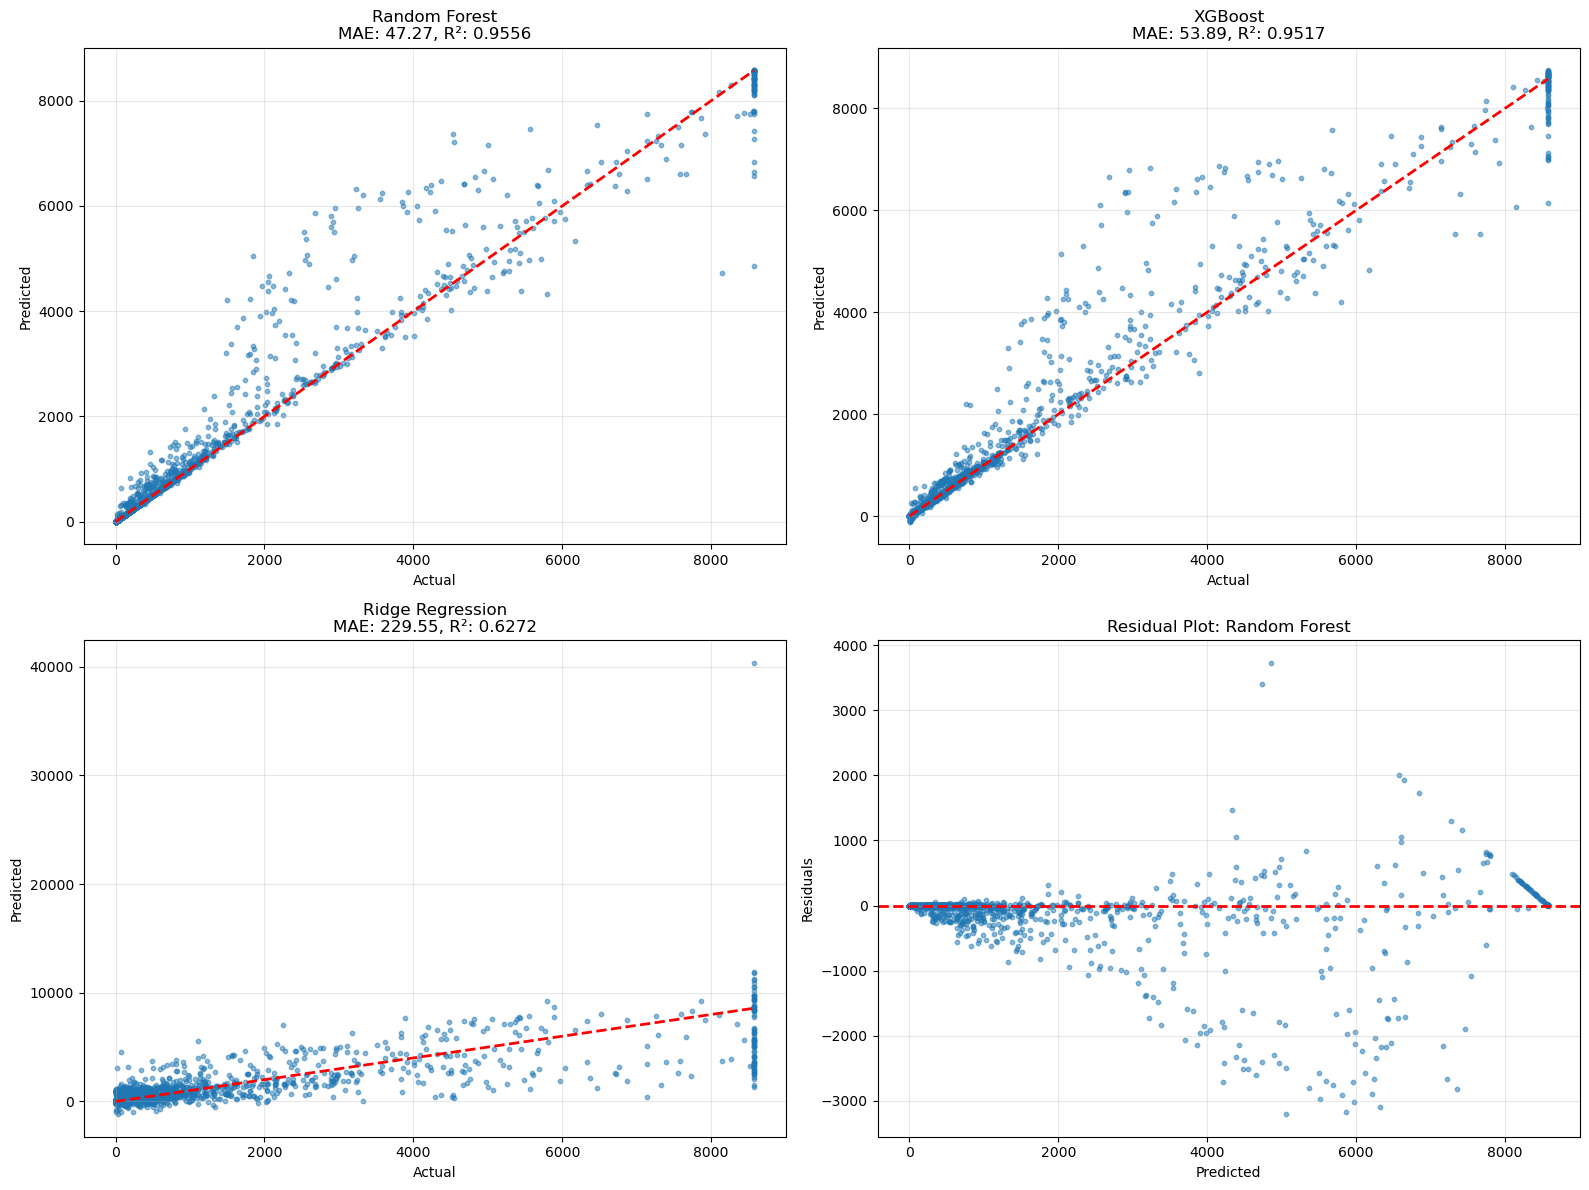

In [65]:
# Visualize predictions vs actual
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Get predictions for top 3 models
top_models = sorted(results.keys(), key=lambda x: results[x]['val']['MAE'])[:3]

for idx, model_name in enumerate(top_models):
    row = idx // 2
    col = idx % 2
    
    if model_name in ['Prophet', 'AutoARIMA', 'LSTM']:
        if model_name == 'Prophet':
            y_pred = y_val_prophet_aligned
        elif model_name == 'AutoARIMA':
            y_pred = y_val_arima_aligned
        else:
            y_pred = y_val_lstm_aligned
    else:
        y_pred = models[model_name].predict(X_val_final)
    
    # Scatter plot
    axes[row, col].scatter(y_val, y_pred, alpha=0.5, s=10)
    axes[row, col].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    axes[row, col].set_xlabel('Actual')
    axes[row, col].set_ylabel('Predicted')
    axes[row, col].set_title(f'{model_name}\nMAE: {results[model_name]["val"]["MAE"]:.2f}, R²: {results[model_name]["val"]["R2"]:.4f}')
    axes[row, col].grid(True, alpha=0.3)

# Residual plot for best model
best_model_name = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
if best_model_name in ['Prophet', 'AutoARIMA', 'LSTM']:
    if best_model_name == 'Prophet':
        y_pred_best = y_val_prophet_aligned
    elif best_model_name == 'AutoARIMA':
        y_pred_best = y_val_arima_aligned
    else:
        y_pred_best = y_val_lstm_aligned
else:
    y_pred_best = models[best_model_name].predict(X_val_final)

residuals = y_val - y_pred_best
axes[1, 1].scatter(y_pred_best, residuals, alpha=0.5, s=10)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Residual Plot: {best_model_name}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



FEATURE IMPORTANCE (Tree-based Models)

Random Forest:
------------------------------------------------------------
Top 10 Features:
   1. historical_monthly_max        : 0.2865
   2. historical_monthly_avg        : 0.2840
   3. cases_to_historical_monthly_avg: 0.1372
   4. cases_acceleration            : 0.0965
   5. cases_per_day                 : 0.0664
   6. cases_lag_1d                  : 0.0567
   7. cases_wow_abs_change          : 0.0369
   8. country_total_cases           : 0.0079
   9. cases_rolling_mean_7d         : 0.0059
  10. cases_rolling_mean_30d        : 0.0045


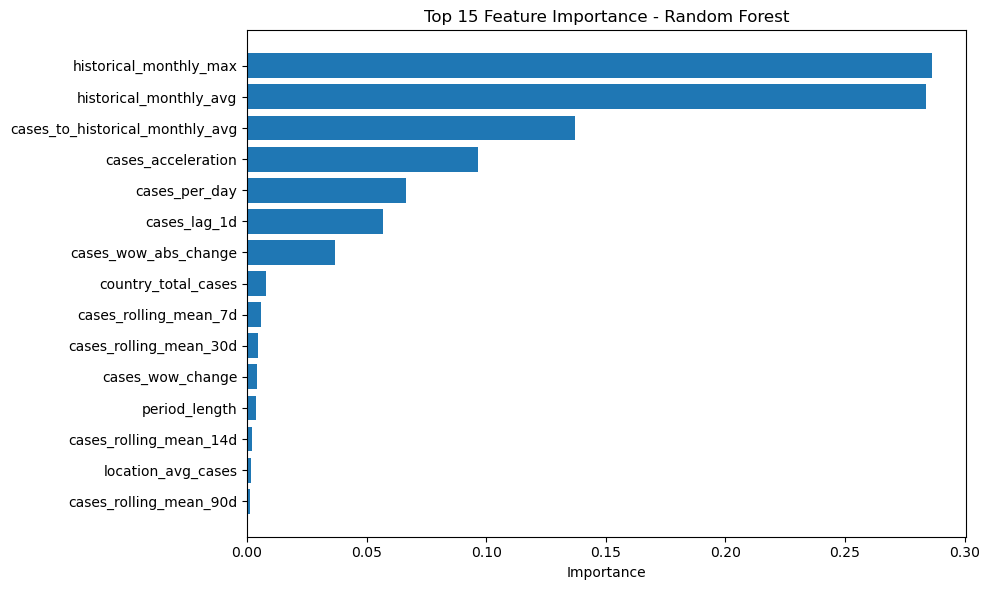


XGBoost:
------------------------------------------------------------
Top 10 Features:
   1. historical_monthly_max        : 0.5462
   2. historical_monthly_avg        : 0.1146
   3. cases_rolling_mean_30d        : 0.0777
   4. cases_to_historical_monthly_avg: 0.0755
   5. cases_acceleration            : 0.0749
   6. cases_lag_1d                  : 0.0311
   7. cases_wow_abs_change          : 0.0231
   8. cases_per_day                 : 0.0168
   9. cases_rolling_mean_7d         : 0.0080
  10. cases_wow_change              : 0.0062


In [66]:
# Feature importance for tree-based models
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE (Tree-based Models)")
print("=" * 60)

tree_models = ['Random Forest', 'XGBoost']
for model_name in tree_models:
    if model_name in models:
        print(f"\n{model_name}:")
        print("-" * 60)
        
        if model_name == 'Random Forest':
            importances = models[model_name].feature_importances_
        else:  # XGBoost
            importances = models[model_name].feature_importances_
        
        # Get top 10 features
        feature_importance = list(zip(feature_cols, importances))
        feature_importance.sort(key=lambda x: x[1], reverse=True)
        
        print("Top 10 Features:")
        for i, (feature, importance) in enumerate(feature_importance[:10], 1):
            print(f"  {i:2d}. {feature:30s}: {importance:.4f}")
        
        # Visualize
        if model_name == 'Random Forest':  # Show for one model
            fig, ax = plt.subplots(figsize=(10, 6))
            top_features = [f[0] for f in feature_importance[:15]]
            top_importances = [f[1] for f in feature_importance[:15]]
            ax.barh(range(len(top_features)), top_importances)
            ax.set_yticks(range(len(top_features)))
            ax.set_yticklabels(top_features)
            ax.set_xlabel('Importance')
            ax.set_title(f'Top 15 Feature Importance - {model_name}')
            ax.invert_yaxis()
            plt.tight_layout()
            plt.show()



MODEL COMPARISON CHART


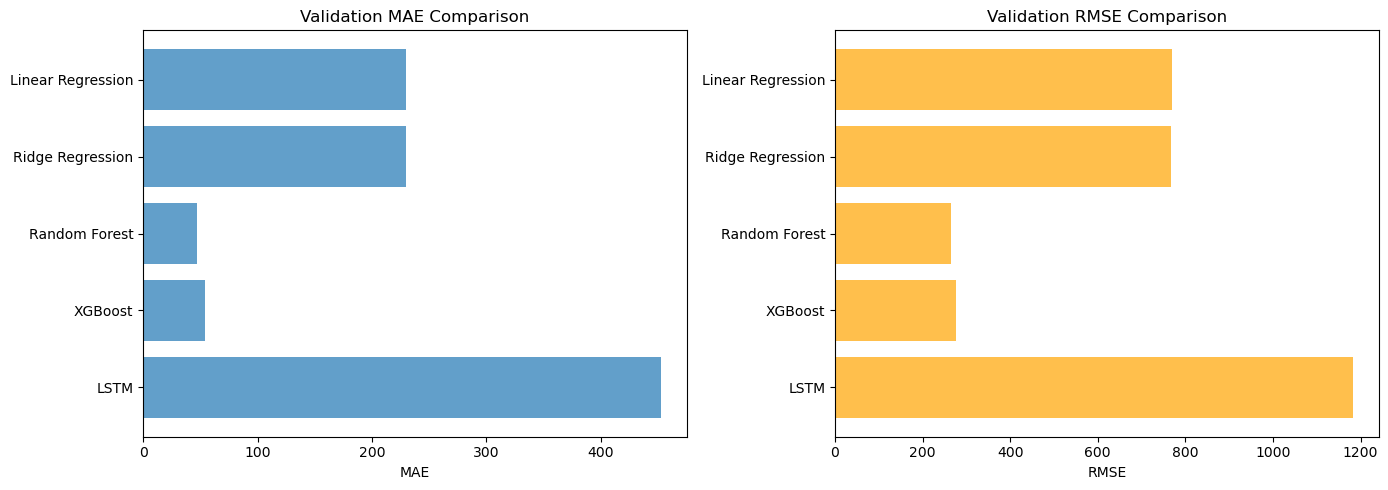


✓ Best Model: Random Forest
  Validation MAE: 47.27
  Validation RMSE: 264.71
  Validation R²: 0.9556
  Validation MAPE: 3.83%


In [67]:
# Model comparison chart
print("\n" + "=" * 60)
print("MODEL COMPARISON CHART")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MAE comparison
model_names = list(results.keys())
mae_values = [results[m]['val']['MAE'] for m in model_names]
rmse_values = [results[m]['val']['RMSE'] for m in model_names]

axes[0].barh(model_names, mae_values, alpha=0.7)
axes[0].set_xlabel('MAE')
axes[0].set_title('Validation MAE Comparison')
axes[0].invert_yaxis()

axes[1].barh(model_names, rmse_values, alpha=0.7, color='orange')
axes[1].set_xlabel('RMSE')
axes[1].set_title('Validation RMSE Comparison')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Find best model
best_model_name = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
print(f"\n✓ Best Model: {best_model_name}")
print(f"  Validation MAE: {results[best_model_name]['val']['MAE']:.2f}")
print(f"  Validation RMSE: {results[best_model_name]['val']['RMSE']:.2f}")
print(f"  Validation R²: {results[best_model_name]['val']['R2']:.4f}")
print(f"  Validation MAPE: {results[best_model_name]['val']['MAPE']:.2f}%")


## Phase 7: Model Selection & Finalization


In [68]:
print("=" * 60)
print("FINAL MODEL EVALUATION ON TEST SET")
print("=" * 60)

# Select best model
best_model_name = min(results.keys(), key=lambda x: results[x]['val']['MAE'])
best_model = models[best_model_name]

print(f"\nSelected Model: {best_model_name}")
print(f"Validation Performance:")
print(f"  MAE: {results[best_model_name]['val']['MAE']:.2f}")
print(f"  RMSE: {results[best_model_name]['val']['RMSE']:.2f}")
print(f"  R²: {results[best_model_name]['val']['R2']:.4f}")

# Evaluate on test set
print("\n" + "-" * 60)
print("Test Set Evaluation:")
print("-" * 60)

if best_model_name in ['Prophet', 'AutoARIMA', 'LSTM']:
    # Handle time-series models differently
    if best_model_name == 'Prophet':
        future_test = prophet_model.make_future_dataframe(periods=len(ts_test))
        forecast_test = prophet_model.predict(future_test)
        y_test_pred = forecast_test['yhat'].values[-len(ts_test):]
        y_test_pred_aligned = np.repeat(y_test_pred, len(y_test) // len(y_test_pred) + 1)[:len(y_test)]
    elif best_model_name == 'AutoARIMA':
        y_test_pred = auto_arima_model.predict(n_periods=len(ts_test))
        y_test_pred_aligned = np.repeat(y_test_pred, len(y_test) // len(y_test_pred) + 1)[:len(y_test)]
    else:  # LSTM
        X_test_seq, y_test_seq = create_sequences(X_test_final, y_test, seq_length)
        y_test_pred = lstm_model.predict(X_test_seq, verbose=0).flatten()
        y_test_pred_aligned = np.concatenate([np.repeat(y_test_pred[0], seq_length), y_test_pred])[:len(y_test)]
else:
    y_test_pred_aligned = best_model.predict(X_test_final)

test_metrics = calculate_metrics(y_test, y_test_pred_aligned, best_model_name)
test_ts_metrics = calculate_ts_metrics(y_test, y_test_pred_aligned)

print(f"MAE:  {test_metrics['MAE']:.2f}")
print(f"RMSE: {test_metrics['RMSE']:.2f}")
print(f"MAPE: {test_metrics['MAPE']:.2f}%")
print(f"R²:   {test_metrics['R2']:.4f}")
print(f"Median AE: {test_metrics['Median_AE']:.2f}")
print(f"Directional Accuracy: {test_ts_metrics['Directional_Accuracy']:.2f}%")
print(f"Bias: {test_ts_metrics['Bias']:.2f}")
print(f"MASE: {test_ts_metrics['MASE']:.4f}")

results[best_model_name]['test'] = test_metrics
results[best_model_name]['test_ts'] = test_ts_metrics


FINAL MODEL EVALUATION ON TEST SET

Selected Model: Random Forest
Validation Performance:
  MAE: 47.27
  RMSE: 264.71
  R²: 0.9556

------------------------------------------------------------
Test Set Evaluation:
------------------------------------------------------------
MAE:  34.38
RMSE: 200.17
MAPE: 5.75%
R²:   0.9791
Median AE: 0.00
Directional Accuracy: 99.46%
Bias: 10.24
MASE: 0.0626


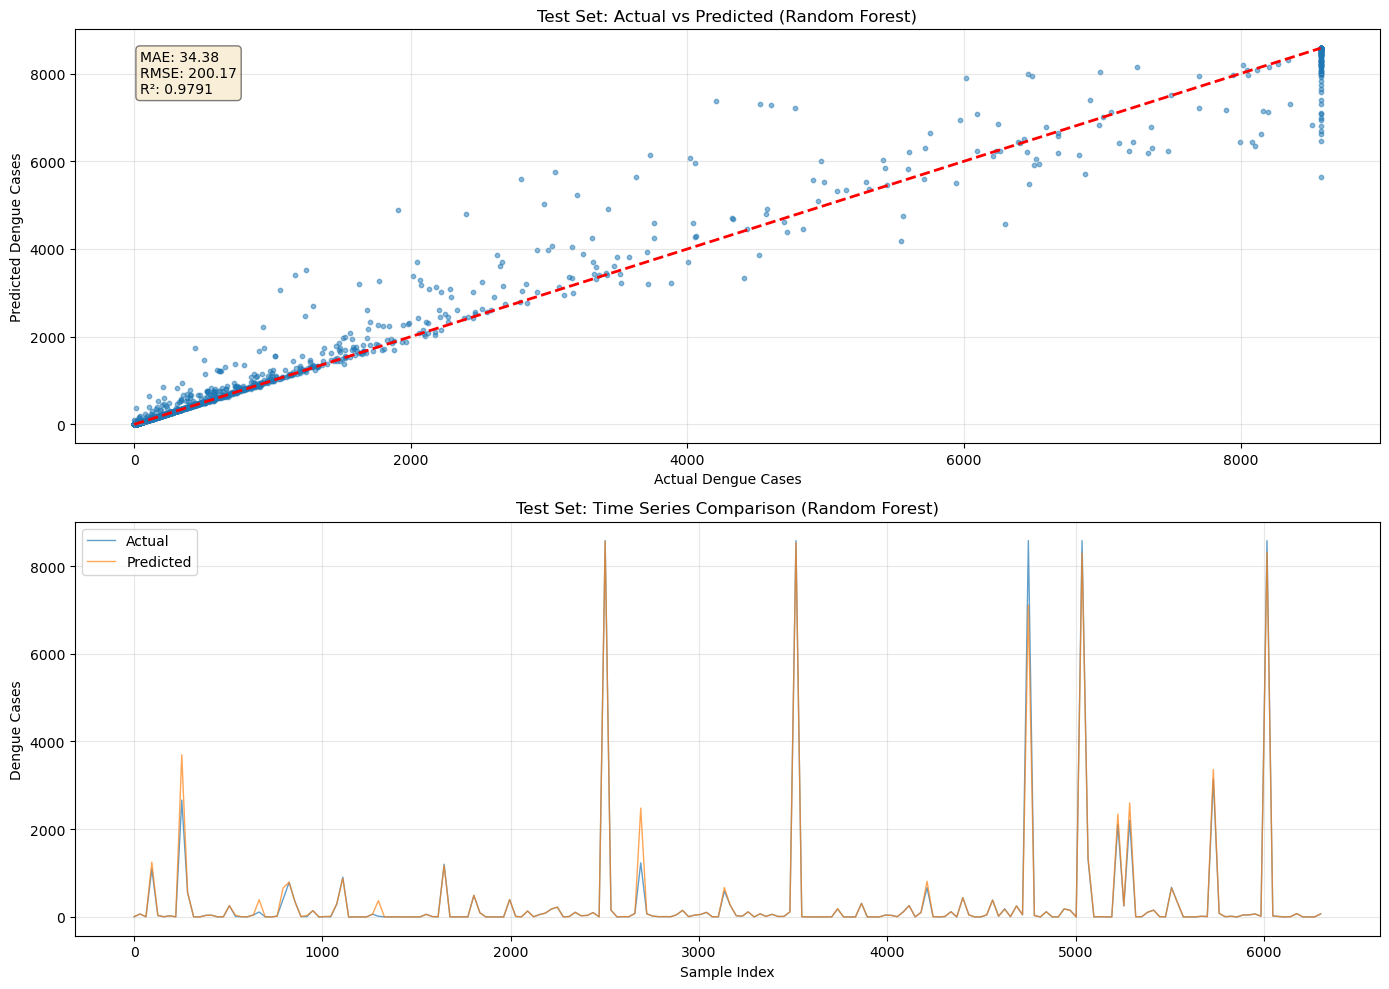

In [69]:
# Visualize test set predictions
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Scatter plot
axes[0].scatter(y_test, y_test_pred_aligned, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Dengue Cases')
axes[0].set_ylabel('Predicted Dengue Cases')
axes[0].set_title(f'Test Set: Actual vs Predicted ({best_model_name})')
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'MAE: {test_metrics["MAE"]:.2f}\nRMSE: {test_metrics["RMSE"]:.2f}\nR²: {test_metrics["R2"]:.4f}',
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Time series plot (sample of test set)
sample_size = min(200, len(y_test))
indices = np.linspace(0, len(y_test)-1, sample_size, dtype=int)
axes[1].plot(indices, y_test[indices], label='Actual', alpha=0.7, linewidth=1)
axes[1].plot(indices, y_test_pred_aligned[indices], label='Predicted', alpha=0.7, linewidth=1)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Dengue Cases')
axes[1].set_title(f'Test Set: Time Series Comparison ({best_model_name})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [70]:
# Save model and artifacts
import joblib
import pickle

print("\n" + "=" * 60)
print("SAVING MODEL ARTIFACTS")
print("=" * 60)

# Create directory for saved models
import os
os.makedirs('saved_models', exist_ok=True)

# Save best model
if best_model_name in ['Prophet', 'AutoARIMA']:
    # Save using pickle for Prophet/AutoARIMA
    with open(f'saved_models/{best_model_name.lower()}_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
elif best_model_name == 'LSTM':
    # Save Keras model
    best_model.save(f'saved_models/{best_model_name.lower()}_model.h5')
else:
    # Save sklearn models
    joblib.dump(best_model, f'saved_models/{best_model_name.lower().replace(" ", "_")}_model.pkl')

# Save scaler
joblib.dump(scaler, 'saved_models/scaler.pkl')

# Save label encoders
with open('saved_models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save feature names
with open('saved_models/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_cols, f)

# Save metadata
metadata = {
    'model_name': best_model_name,
    'feature_cols': feature_cols,
    'target_col': target_col,
    'train_metrics': results[best_model_name]['train'],
    'val_metrics': results[best_model_name]['val'],
    'test_metrics': results[best_model_name]['test'],
    'test_ts_metrics': results[best_model_name]['test_ts']
}

with open('saved_models/model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print(f"✓ Saved {best_model_name} model")
print(f"✓ Saved scaler")
print(f"✓ Saved label encoders")
print(f"✓ Saved feature names")
print(f"✓ Saved model metadata")

# Create prediction function
def predict_dengue_cases(features_dict):
    """
    Predict dengue cases for new data
    
    Parameters:
    -----------
    features_dict : dict
        Dictionary with feature names as keys and values as feature values
    
    Returns:
    --------
    prediction : float
        Predicted dengue cases
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([features_dict])
    
    # Encode categoricals
    for col in categorical_cols:
        if col in input_df.columns and col in label_encoders:
            try:
                input_df[f'{col}_encoded'] = label_encoders[col].transform([str(features_dict[col])])
            except:
                input_df[f'{col}_encoded'] = 0
    
    # Prepare feature vector
    input_features = input_df[[f'{col}_encoded' if col in categorical_cols else col 
                               for col in feature_cols]].fillna(0)
    
    # Scale
    input_scaled = scaler.transform(input_features)
    
    # Predict
    prediction = best_model.predict(input_scaled)[0]
    
    return max(0, prediction)  # Ensure non-negative

print(f"\n✓ Prediction function created")
print(f"\nExample usage:")
print(f"  prediction = predict_dengue_cases({{'temperature': 25, 'humidity': 70, ...}})")



SAVING MODEL ARTIFACTS
✓ Saved Random Forest model
✓ Saved scaler
✓ Saved label encoders
✓ Saved feature names
✓ Saved model metadata

✓ Prediction function created

Example usage:
  prediction = predict_dengue_cases({'temperature': 25, 'humidity': 70, ...})


In [71]:
# Final summary
print("\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df):,} samples")
print(f"Features: {len(feature_cols)}")
print(f"Target: {target_col}")
print(f"\nBest Model: {best_model_name}")
print(f"\nPerformance Metrics:")
print(f"  Training Set:")
print(f"    MAE:  {results[best_model_name]['train']['MAE']:.2f}")
print(f"    RMSE: {results[best_model_name]['train']['RMSE']:.2f}")
print(f"    R²:   {results[best_model_name]['train']['R2']:.4f}")
print(f"\n  Validation Set:")
print(f"    MAE:  {results[best_model_name]['val']['MAE']:.2f}")
print(f"    RMSE: {results[best_model_name]['val']['RMSE']:.2f}")
print(f"    R²:   {results[best_model_name]['val']['R2']:.4f}")
print(f"\n  Test Set:")
print(f"    MAE:  {results[best_model_name]['test']['MAE']:.2f}")
print(f"    RMSE: {results[best_model_name]['test']['RMSE']:.2f}")
print(f"    R²:   {results[best_model_name]['test']['R2']:.4f}")
print(f"    MAPE: {results[best_model_name]['test']['MAPE']:.2f}%")
print(f"    Directional Accuracy: {results[best_model_name]['test_ts']['Directional_Accuracy']:.2f}%")

print(f"\n✓ Model artifacts saved in 'saved_models/' directory")
print(f"✓ Pipeline complete!")



FINAL SUMMARY

Dataset: 41,997 samples
Features: 52
Target: dengue_total

Best Model: Random Forest

Performance Metrics:
  Training Set:
    MAE:  2.86
    RMSE: 25.16
    R²:   0.9994

  Validation Set:
    MAE:  47.27
    RMSE: 264.71
    R²:   0.9556

  Test Set:
    MAE:  34.38
    RMSE: 200.17
    R²:   0.9791
    MAPE: 5.75%
    Directional Accuracy: 99.46%

✓ Model artifacts saved in 'saved_models/' directory
✓ Pipeline complete!


## Phase 8: Address Overfitting in Random Forest Model


### Phase 1: Hyperparameter Tuning for Regularization


In [72]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import ExtraTreesRegressor
import time

print("=" * 60)
print("HYPERPARAMETER TUNING FOR RANDOM FOREST")
print("=" * 60)
print("\nCurrent Model Performance (Overfitting Detected):")
print(f"  Training R²: {results['Random Forest']['train']['R2']:.4f}")
print(f"  Validation R²: {results['Random Forest']['val']['R2']:.4f}")
print(f"  Gap: {results['Random Forest']['train']['R2'] - results['Random Forest']['val']['R2']:.4f}")
print(f"  Training MAE: {results['Random Forest']['train']['MAE']:.2f}")
print(f"  Validation MAE: {results['Random Forest']['val']['MAE']:.2f}")

# Define parameter grid for regularization
param_grid = {
    'max_depth': [8, 10, 12, 15],
    'min_samples_split': [10, 20, 30, 50],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [50, 100, 150]
}

print(f"\nSearch space: {len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features']) * len(param_grid['n_estimators'])} combinations")

# Use RandomizedSearchCV for efficiency (test 50 random combinations)
print("\nStarting RandomizedSearchCV (50 iterations)...")
print("This may take several minutes...")

# Time-series aware cross-validation
tscv = TimeSeriesSplit(n_splits=3)

rf_tuned = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    cv=tscv,
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
rf_tuned.fit(X_train_final, y_train)
elapsed_time = time.time() - start_time

print(f"\n✓ Hyperparameter tuning completed in {elapsed_time/60:.1f} minutes")
print(f"\nBest Parameters:")
for param, value in rf_tuned.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest CV Score (negative MAE): {rf_tuned.best_score_:.2f}")

# Evaluate tuned model
rf_tuned_model = rf_tuned.best_estimator_
y_train_pred_tuned = rf_tuned_model.predict(X_train_final)
y_val_pred_tuned = rf_tuned_model.predict(X_val_final)

tuned_metrics_train = calculate_metrics(y_train, y_train_pred_tuned, 'RF Tuned')
tuned_metrics_val = calculate_metrics(y_val, y_val_pred_tuned, 'RF Tuned')

print(f"\nTuned Model Performance:")
print(f"  Training - MAE: {tuned_metrics_train['MAE']:.2f}, RMSE: {tuned_metrics_train['RMSE']:.2f}, R²: {tuned_metrics_train['R2']:.4f}")
print(f"  Validation - MAE: {tuned_metrics_val['MAE']:.2f}, RMSE: {tuned_metrics_val['RMSE']:.2f}, R²: {tuned_metrics_val['R2']:.4f}")
print(f"  R² Gap: {tuned_metrics_train['R2'] - tuned_metrics_val['R2']:.4f} (was {results['Random Forest']['train']['R2'] - results['Random Forest']['val']['R2']:.4f})")

# Store tuned model
models['Random Forest Tuned'] = rf_tuned_model
results['Random Forest Tuned'] = {
    'train': tuned_metrics_train,
    'val': tuned_metrics_val,
    'best_params': rf_tuned.best_params_
}


HYPERPARAMETER TUNING FOR RANDOM FOREST

Current Model Performance (Overfitting Detected):
  Training R²: 0.9994
  Validation R²: 0.9556
  Gap: 0.0437
  Training MAE: 2.86
  Validation MAE: 47.27

Search space: 576 combinations

Starting RandomizedSearchCV (50 iterations)...
This may take several minutes...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

✓ Hyperparameter tuning completed in 1.3 minutes

Best Parameters:
  n_estimators: 100
  min_samples_split: 30
  min_samples_leaf: 5
  max_features: 0.5
  max_depth: 10

Best CV Score (negative MAE): -71.91

Tuned Model Performance:
  Training - MAE: 15.96, RMSE: 90.63, R²: 0.9916
  Validation - MAE: 57.69, RMSE: 237.89, R²: 0.9642
  R² Gap: 0.0274 (was 0.0437)


In [73]:
# Try ExtraTreesRegressor (more randomization, often reduces overfitting)
print("\n" + "=" * 60)
print("EXTRA TREES REGRESSOR (Alternative Regularization)")
print("=" * 60)

# Use similar parameters to tuned RF
et_model = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

et_model.fit(X_train_final, y_train)
y_train_pred_et = et_model.predict(X_train_final)
y_val_pred_et = et_model.predict(X_val_final)

et_metrics_train = calculate_metrics(y_train, y_train_pred_et, 'Extra Trees')
et_metrics_val = calculate_metrics(y_val, y_val_pred_et, 'Extra Trees')

print(f"Extra Trees Performance:")
print(f"  Training - MAE: {et_metrics_train['MAE']:.2f}, RMSE: {et_metrics_train['RMSE']:.2f}, R²: {et_metrics_train['R2']:.4f}")
print(f"  Validation - MAE: {et_metrics_val['MAE']:.2f}, RMSE: {et_metrics_val['RMSE']:.2f}, R²: {et_metrics_val['R2']:.4f}")
print(f"  R² Gap: {et_metrics_train['R2'] - et_metrics_val['R2']:.4f}")

models['Extra Trees'] = et_model
results['Extra Trees'] = {
    'train': et_metrics_train,
    'val': et_metrics_val
}



EXTRA TREES REGRESSOR (Alternative Regularization)
Extra Trees Performance:
  Training - MAE: 87.41, RMSE: 277.92, R²: 0.9207
  Validation - MAE: 174.51, RMSE: 567.42, R²: 0.7962
  R² Gap: 0.1245


### Phase 2: Error Analysis


ERROR ANALYSIS - Original Random Forest Model

Error Statistics:
  Mean Error: -30.58
  Median Absolute Error: 0.00
  Max Absolute Error: 3728.33
  95th Percentile Error: 184.78
  99th Percentile Error: 1608.37

Errors by Region:
             mean  median         std  count
region                                      
SEARO   47.269382     0.0  260.478884   6299

Top 5 Countries by Mean Absolute Error:
               mean  count
country                   
LKA      847.283105    253
BGD      223.561628     50
IND      150.195294    142
MMR       72.399468     31
NPL       43.287934     63


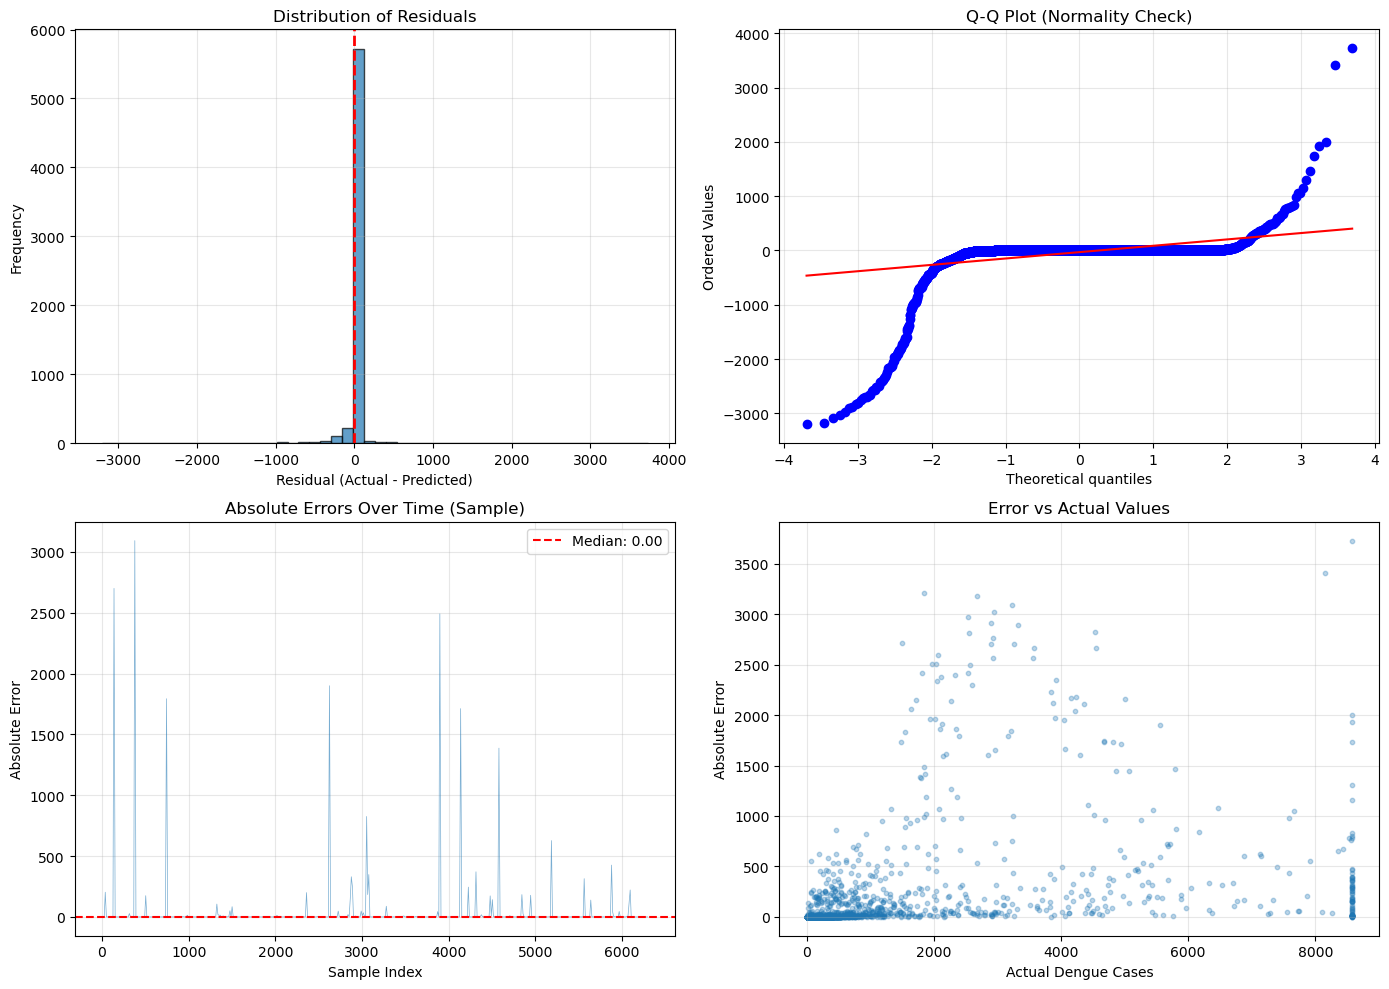


✓ Error analysis complete


In [74]:
print("=" * 60)
print("ERROR ANALYSIS - Original Random Forest Model")
print("=" * 60)

# Get predictions from original RF model
rf_original = models['Random Forest']
y_val_pred_original = rf_original.predict(X_val_final)
residuals_original = y_val - y_val_pred_original
abs_errors_original = np.abs(residuals_original)

# Error statistics
print(f"\nError Statistics:")
print(f"  Mean Error: {np.mean(residuals_original):.2f}")
print(f"  Median Absolute Error: {np.median(abs_errors_original):.2f}")
print(f"  Max Absolute Error: {np.max(abs_errors_original):.2f}")
print(f"  95th Percentile Error: {np.percentile(abs_errors_original, 95):.2f}")
print(f"  99th Percentile Error: {np.percentile(abs_errors_original, 99):.2f}")

# Analyze errors by region (if available in validation set)
if 'region' in df_sorted.columns:
    val_indices = range(n_train, n_train + n_val)
    val_regions = df_sorted.iloc[val_indices]['region'].values if len(df_sorted) > n_train + n_val else []
    
    if len(val_regions) == len(residuals_original):
        print(f"\nErrors by Region:")
        region_errors = pd.DataFrame({
            'region': val_regions,
            'error': abs_errors_original
        })
        region_stats = region_errors.groupby('region')['error'].agg(['mean', 'median', 'std', 'count'])
        print(region_stats.sort_values('mean', ascending=False))

# Analyze errors by country
if 'ISO_A0' in df_sorted.columns:
    val_countries = df_sorted.iloc[val_indices]['ISO_A0'].values if len(df_sorted) > n_train + n_val else []
    
    if len(val_countries) == len(residuals_original):
        print(f"\nTop 5 Countries by Mean Absolute Error:")
        country_errors = pd.DataFrame({
            'country': val_countries,
            'error': abs_errors_original
        })
        country_stats = country_errors.groupby('country')['error'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        print(country_stats.head())

# Visualize error distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of residuals
axes[0, 0].hist(residuals_original, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_title('Distribution of Residuals')
axes[0, 0].set_xlabel('Residual (Actual - Predicted)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
stats.probplot(residuals_original, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normality Check)')
axes[0, 1].grid(True, alpha=0.3)

# Absolute errors over time (sample)
sample_size = min(500, len(abs_errors_original))
sample_indices = np.linspace(0, len(abs_errors_original)-1, sample_size, dtype=int)
axes[1, 0].plot(sample_indices, abs_errors_original[sample_indices], alpha=0.6, linewidth=0.5)
axes[1, 0].axhline(np.median(abs_errors_original), color='r', linestyle='--', label=f'Median: {np.median(abs_errors_original):.2f}')
axes[1, 0].set_title('Absolute Errors Over Time (Sample)')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Absolute Error')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Scatter: Actual vs Error
axes[1, 1].scatter(y_val, abs_errors_original, alpha=0.3, s=10)
axes[1, 1].set_xlabel('Actual Dengue Cases')
axes[1, 1].set_ylabel('Absolute Error')
axes[1, 1].set_title('Error vs Actual Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Error analysis complete")


### Phase 3: Model Comparison & Selection


MODEL COMPARISON - Overfitting Analysis

Model                     Train R²     Val R²       R² Gap       Train MAE    Val MAE      MAE Ratio   
----------------------------------------------------------------------------------------------------
Random Forest             0.9994       0.9556       0.0437       2.86         47.27        16.52       
Random Forest Tuned       0.9916       0.9642       0.0274       15.96        57.69        3.61        
Extra Trees               0.9207       0.7962       0.1245       87.41        174.51       2.00        
XGBoost                   0.9998       0.9517       0.0481       4.87         53.89        11.07       


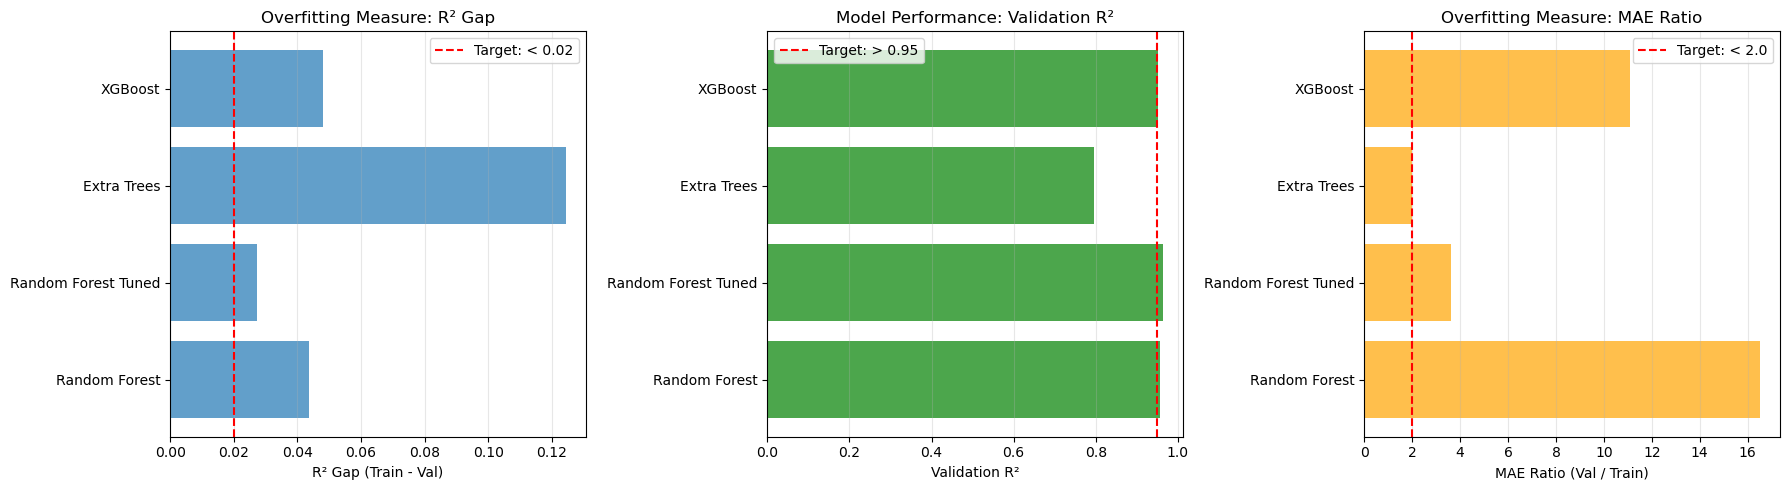


BEST MODEL SELECTION

Selection Criteria:
  1. Validation R² > 0.95 (performance)
  2. R² Gap < 0.02 (low overfitting)
  3. MAE Ratio < 2.0 (low overfitting)
  4. Lowest validation MAE (best prediction)

⚠ No model meets all criteria. Best balanced model: Random Forest Tuned

Best Model Metrics:
  Validation R²: 0.9642
  R² Gap: 0.0274
  Validation MAE: 57.69
  MAE Ratio: 3.61


In [75]:
print("=" * 60)
print("MODEL COMPARISON - Overfitting Analysis")
print("=" * 60)

# Compare all Random Forest variants
rf_models = ['Random Forest', 'Random Forest Tuned', 'Extra Trees']
if 'XGBoost' in results:
    rf_models.append('XGBoost')

print(f"\n{'Model':<25} {'Train R²':<12} {'Val R²':<12} {'R² Gap':<12} {'Train MAE':<12} {'Val MAE':<12} {'MAE Ratio':<12}")
print("-" * 100)

comparison_data = []
for model_name in rf_models:
    if model_name in results:
        train_r2 = results[model_name]['train']['R2']
        val_r2 = results[model_name]['val']['R2']
        r2_gap = train_r2 - val_r2
        train_mae = results[model_name]['train']['MAE']
        val_mae = results[model_name]['val']['MAE']
        mae_ratio = val_mae / train_mae if train_mae > 0 else np.inf
        
        comparison_data.append({
            'Model': model_name,
            'Train_R2': train_r2,
            'Val_R2': val_r2,
            'R2_Gap': r2_gap,
            'Train_MAE': train_mae,
            'Val_MAE': val_mae,
            'MAE_Ratio': mae_ratio
        })
        
        print(f"{model_name:<25} {train_r2:<12.4f} {val_r2:<12.4f} {r2_gap:<12.4f} {train_mae:<12.2f} {val_mae:<12.2f} {mae_ratio:<12.2f}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparison_df = pd.DataFrame(comparison_data)

# R² Gap comparison
axes[0].barh(comparison_df['Model'], comparison_df['R2_Gap'], alpha=0.7)
axes[0].axvline(0.02, color='r', linestyle='--', label='Target: < 0.02')
axes[0].set_xlabel('R² Gap (Train - Val)')
axes[0].set_title('Overfitting Measure: R² Gap')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Validation R² comparison
axes[1].barh(comparison_df['Model'], comparison_df['Val_R2'], alpha=0.7, color='green')
axes[1].axvline(0.95, color='r', linestyle='--', label='Target: > 0.95')
axes[1].set_xlabel('Validation R²')
axes[1].set_title('Model Performance: Validation R²')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='x')

# MAE Ratio comparison
axes[2].barh(comparison_df['Model'], comparison_df['MAE_Ratio'], alpha=0.7, color='orange')
axes[2].axvline(2.0, color='r', linestyle='--', label='Target: < 2.0')
axes[2].set_xlabel('MAE Ratio (Val / Train)')
axes[2].set_title('Overfitting Measure: MAE Ratio')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Select best model based on criteria: low overfitting + good performance
print("\n" + "=" * 60)
print("BEST MODEL SELECTION")
print("=" * 60)
print("\nSelection Criteria:")
print("  1. Validation R² > 0.95 (performance)")
print("  2. R² Gap < 0.02 (low overfitting)")
print("  3. MAE Ratio < 2.0 (low overfitting)")
print("  4. Lowest validation MAE (best prediction)")

# Filter models meeting criteria
valid_models = comparison_df[
    (comparison_df['Val_R2'] > 0.95) & 
    (comparison_df['R2_Gap'] < 0.02) &
    (comparison_df['MAE_Ratio'] < 2.0)
]

if len(valid_models) > 0:
    # Among valid models, select one with lowest validation MAE
    best_tuned_model_name = valid_models.loc[valid_models['Val_MAE'].idxmin(), 'Model']
    print(f"\n✓ Best Model (meets all criteria): {best_tuned_model_name}")
else:
    # If no model meets all criteria, select based on best balance
    # Score = Val_R2 - (R2_Gap * 10) - (MAE_Ratio * 0.1)
    comparison_df['Score'] = comparison_df['Val_R2'] - (comparison_df['R2_Gap'] * 10) - (comparison_df['MAE_Ratio'] * 0.1)
    best_tuned_model_name = comparison_df.loc[comparison_df['Score'].idxmax(), 'Model']
    print(f"\n⚠ No model meets all criteria. Best balanced model: {best_tuned_model_name}")

best_tuned_metrics = comparison_df[comparison_df['Model'] == best_tuned_model_name].iloc[0]
print(f"\nBest Model Metrics:")
print(f"  Validation R²: {best_tuned_metrics['Val_R2']:.4f}")
print(f"  R² Gap: {best_tuned_metrics['R2_Gap']:.4f}")
print(f"  Validation MAE: {best_tuned_metrics['Val_MAE']:.2f}")
print(f"  MAE Ratio: {best_tuned_metrics['MAE_Ratio']:.2f}")


### Phase 4: Final Evaluation on Test Set


FINAL EVALUATION - Best Tuned Model on Test Set

Model: Random Forest Tuned

Test Set Performance:
  MAE:  55.13
  RMSE: 260.74
  MAPE: 172.08%
  R²:   0.9646
  Median AE: 4.83
  Directional Accuracy: 94.21%
  Bias: -3.99

------------------------------------------------------------
Comparison: Original vs Tuned Model
------------------------------------------------------------
Metric                    Original        Tuned           Improvement    
----------------------------------------------------------------------
Train R²                  0.9994          0.9916          ✗ -0.78%
Val R²                    0.9556          0.9642          ✓ +0.89%
R² Gap (Train-Val)        0.0437          0.0274          ✓ +37.33%
Test MAE                  34.3806         55.1332         ✗ -60.36%
Test RMSE                 200.1687        260.7421        ✗ -30.26%
Test R²                   0.9791          0.9646          ✗ -1.49%


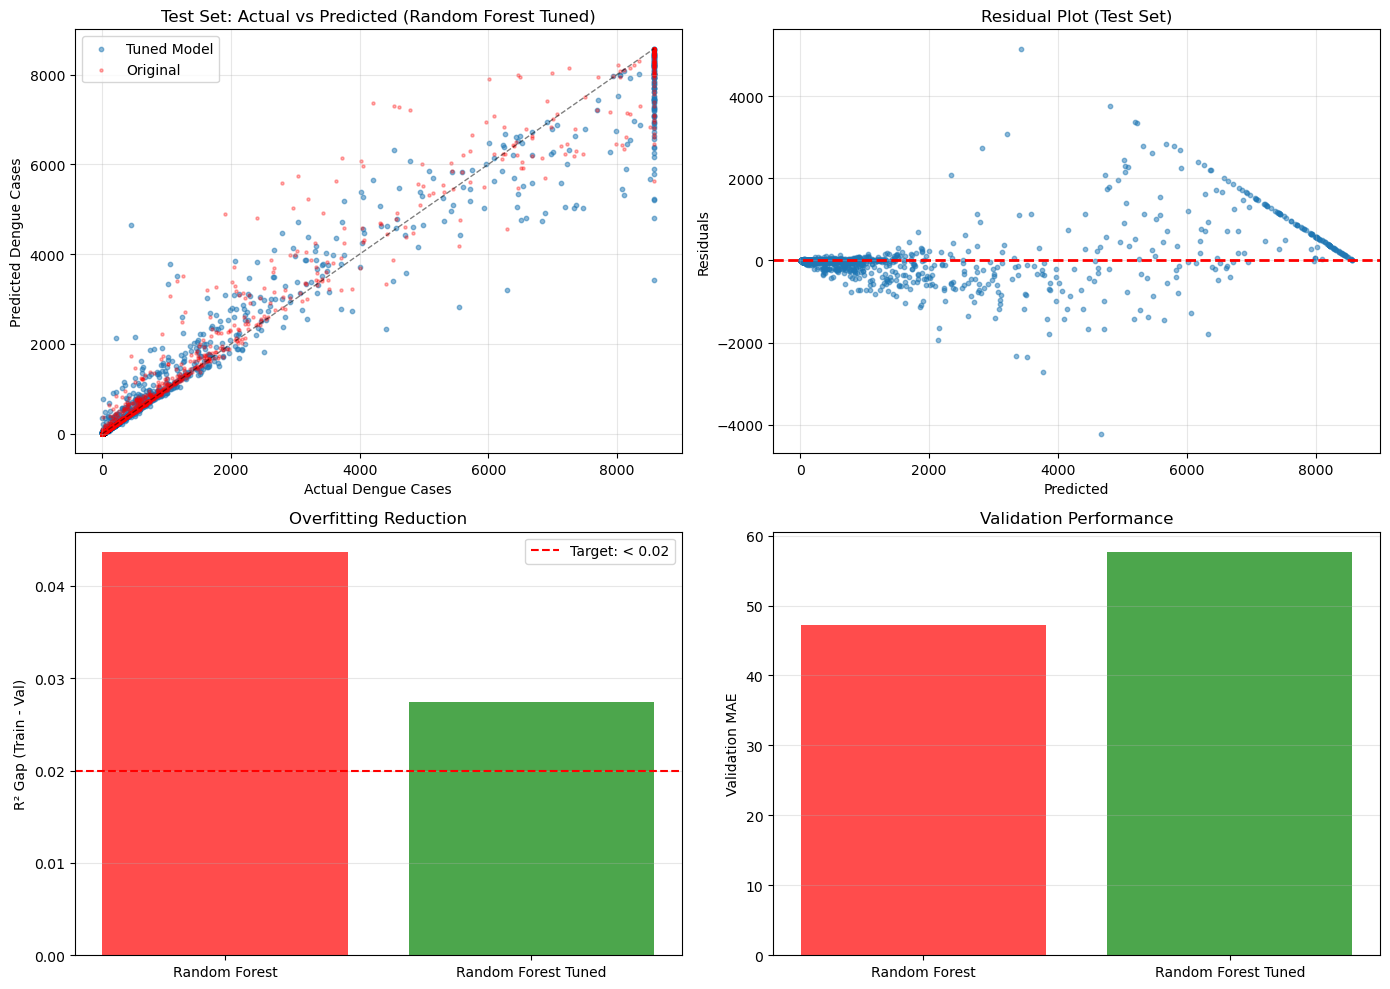


✓ Final evaluation complete


In [76]:
print("=" * 60)
print("FINAL EVALUATION - Best Tuned Model on Test Set")
print("=" * 60)

# Get best tuned model
best_tuned_model = models[best_tuned_model_name]

# Evaluate on test set
y_test_pred_tuned = best_tuned_model.predict(X_test_final)
test_metrics_tuned = calculate_metrics(y_test, y_test_pred_tuned, best_tuned_model_name)
test_ts_metrics_tuned = calculate_ts_metrics(y_test, y_test_pred_tuned)

# Compare with original model
print(f"\nModel: {best_tuned_model_name}")
print(f"\nTest Set Performance:")
print(f"  MAE:  {test_metrics_tuned['MAE']:.2f}")
print(f"  RMSE: {test_metrics_tuned['RMSE']:.2f}")
print(f"  MAPE: {test_metrics_tuned['MAPE']:.2f}%")
print(f"  R²:   {test_metrics_tuned['R2']:.4f}")
print(f"  Median AE: {test_metrics_tuned['Median_AE']:.2f}")
print(f"  Directional Accuracy: {test_ts_metrics_tuned['Directional_Accuracy']:.2f}%")
print(f"  Bias: {test_ts_metrics_tuned['Bias']:.2f}")

# Compare with original Random Forest
print(f"\n" + "-" * 60)
print("Comparison: Original vs Tuned Model")
print("-" * 60)
print(f"{'Metric':<25} {'Original':<15} {'Tuned':<15} {'Improvement':<15}")
print("-" * 70)

original_test = results['Random Forest']['test']
original_train = results['Random Forest']['train']
tuned_train = results[best_tuned_model_name]['train']

comparisons = [
    ('Train R²', original_train['R2'], tuned_train['R2'], 'higher' if tuned_train['R2'] < original_train['R2'] else 'lower'),
    ('Val R²', results['Random Forest']['val']['R2'], results[best_tuned_model_name]['val']['R2'], 'higher'),
    ('R² Gap (Train-Val)', original_train['R2'] - results['Random Forest']['val']['R2'], 
     tuned_train['R2'] - results[best_tuned_model_name]['val']['R2'], 'lower'),
    ('Test MAE', original_test['MAE'], test_metrics_tuned['MAE'], 'lower'),
    ('Test RMSE', original_test['RMSE'], test_metrics_tuned['RMSE'], 'lower'),
    ('Test R²', original_test['R2'], test_metrics_tuned['R2'], 'higher'),
]

for metric, orig_val, tuned_val, direction in comparisons:
    if direction == 'lower':
        improvement = ((orig_val - tuned_val) / orig_val * 100) if orig_val > 0 else 0
        symbol = '✓' if tuned_val < orig_val else '✗'
    else:
        improvement = ((tuned_val - orig_val) / orig_val * 100) if orig_val > 0 else 0
        symbol = '✓' if tuned_val > orig_val else '✗'
    
    print(f"{metric:<25} {orig_val:<15.4f} {tuned_val:<15.4f} {symbol} {improvement:+.2f}%")

# Store test results
results[best_tuned_model_name]['test'] = test_metrics_tuned
results[best_tuned_model_name]['test_ts'] = test_ts_metrics_tuned

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Test set predictions scatter
y_test_pred_original = models['Random Forest'].predict(X_test_final)
axes[0, 0].scatter(y_test, y_test_pred_tuned, alpha=0.5, s=10, label='Tuned Model')
axes[0, 0].scatter(y_test, y_test_pred_original, alpha=0.3, s=5, color='red', label='Original')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1, alpha=0.5)
axes[0, 0].set_xlabel('Actual Dengue Cases')
axes[0, 0].set_ylabel('Predicted Dengue Cases')
axes[0, 0].set_title(f'Test Set: Actual vs Predicted ({best_tuned_model_name})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Residuals
residuals_tuned = y_test - y_test_pred_tuned
axes[0, 1].scatter(y_test_pred_tuned, residuals_tuned, alpha=0.5, s=10)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot (Test Set)')
axes[0, 1].grid(True, alpha=0.3)

# R² Gap comparison
models_compare = ['Random Forest', best_tuned_model_name]
r2_gaps = [
    results['Random Forest']['train']['R2'] - results['Random Forest']['val']['R2'],
    results[best_tuned_model_name]['train']['R2'] - results[best_tuned_model_name]['val']['R2']
]
axes[1, 0].bar(models_compare, r2_gaps, alpha=0.7, color=['red', 'green'])
axes[1, 0].axhline(0.02, color='r', linestyle='--', label='Target: < 0.02')
axes[1, 0].set_ylabel('R² Gap (Train - Val)')
axes[1, 0].set_title('Overfitting Reduction')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Validation MAE comparison
val_maes = [
    results['Random Forest']['val']['MAE'],
    results[best_tuned_model_name]['val']['MAE']
]
axes[1, 1].bar(models_compare, val_maes, alpha=0.7, color=['red', 'green'])
axes[1, 1].set_ylabel('Validation MAE')
axes[1, 1].set_title('Validation Performance')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Final evaluation complete")


In [ ]:
# Save the best tuned model
print("=" * 60)
print("SAVING BEST TUNED MODEL")
print("=" * 60)

import joblib
import pickle

# Update best model
best_final_model = best_tuned_model
best_final_model_name = best_tuned_model_name

# Save best tuned model
if best_tuned_model_name == 'Random Forest Tuned':
    joblib.dump(best_final_model, 'saved_models/random_forest_tuned_model.pkl')
    # Save best parameters
    with open('saved_models/random_forest_tuned_params.pkl', 'wb') as f:
        pickle.dump(results[best_tuned_model_name]['best_params'], f)
elif best_tuned_model_name == 'Extra Trees':
    joblib.dump(best_final_model, 'saved_models/extra_trees_model.pkl')
else:
    joblib.dump(best_final_model, f'saved_models/{best_tuned_model_name.lower().replace(" ", "_")}_model.pkl')

# Update metadata
metadata_tuned = {
    'model_name': best_final_model_name,
    'feature_cols': feature_cols,
    'target_col': target_col,
    'train_metrics': results[best_final_model_name]['train'],
    'val_metrics': results[best_final_model_name]['val'],
    'test_metrics': results[best_final_model_name]['test'],
    'test_ts_metrics': results[best_final_model_name]['test_ts'],
    'overfitting_analysis': {
        'r2_gap': results[best_final_model_name]['train']['R2'] - results[best_final_model_name]['val']['R2'],
        'mae_ratio': results[best_final_model_name]['val']['MAE'] / results[best_final_model_name]['train']['MAE'],
        'original_r2_gap': results['Random Forest']['train']['R2'] - results['Random Forest']['val']['R2'],
        'improvement': 'Overfitting reduced' if (results[best_final_model_name]['train']['R2'] - results[best_final_model_name]['val']['R2']) < (results['Random Forest']['train']['R2'] - results['Random Forest']['val']['R2']) else 'Performance improved'
    }
}

if 'best_params' in results[best_final_model_name]:
    metadata_tuned['best_params'] = results[best_final_model_name]['best_params']

with open('saved_models/model_metadata_tuned.pkl', 'wb') as f:
    pickle.dump(metadata_tuned, f)

print(f"✓ Saved {best_final_model_name} model")
print(f"✓ Saved updated metadata")
print(f"\nFinal Summary:")
print(f"  Model: {best_final_model_name}")
print(f"  Validation R²: {results[best_final_model_name]['val']['R2']:.4f}")
print(f"  R² Gap: {results[best_final_model_name]['train']['R2'] - results[best_final_model_name]['val']['R2']:.4f}")
print(f"  Test MAE: {results[best_final_model_name]['test']['MAE']:.2f}")
print(f"  Test R²: {results[best_final_model_name]['test']['R2']:.4f}")
print(f"\n✓ Overfitting reduction complete!")


SAVING BEST TUNED MODEL
✓ Saved Random Forest Tuned model
✓ Saved updated metadata

Final Summary:
  Model: Random Forest Tuned
  Validation R²: 0.9642
  R² Gap: 0.0274
  Test MAE: 55.13
  Test R²: 0.9646

✓ Overfitting reduction complete!


Exception ignored in: <function ResourceTracker.__del__ at 0x7eae0ab8ff60>
Traceback (most recent call last):
  File "/home/asif-ahammed/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/asif-ahammed/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/asif-ahammed/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7f41ec787f60>
Traceback (most recent call last):
  File "/home/asif-ahammed/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/asif-ahammed/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/asif-ahammed/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception igno

## Phase 9: Advanced Overfitting Reduction


### Step 1: Feature Importance Analysis for Overfitting


FEATURE IMPORTANCE ANALYSIS - Overfitting Contributors

Top 15 Features Contributing to Overfitting:
(Features with highest importance reduction in tuned model)
--------------------------------------------------------------------------------
Feature                                  Original     Tuned        Difference  
--------------------------------------------------------------------------------
historical_monthly_avg                   0.284047     0.205446     0.078601    
cases_to_historical_monthly_avg          0.137223     0.069735     0.067488    
historical_monthly_max                   0.286450     0.248384     0.038066    
cases_per_day                            0.066387     0.039517     0.026869    
year                                     0.000499     0.000170     0.000329    
day_of_year_sin                          0.000373     0.000127     0.000246    
cases_7d_vs_30d_pct                      0.000251     0.000108     0.000143    
month_sin                            

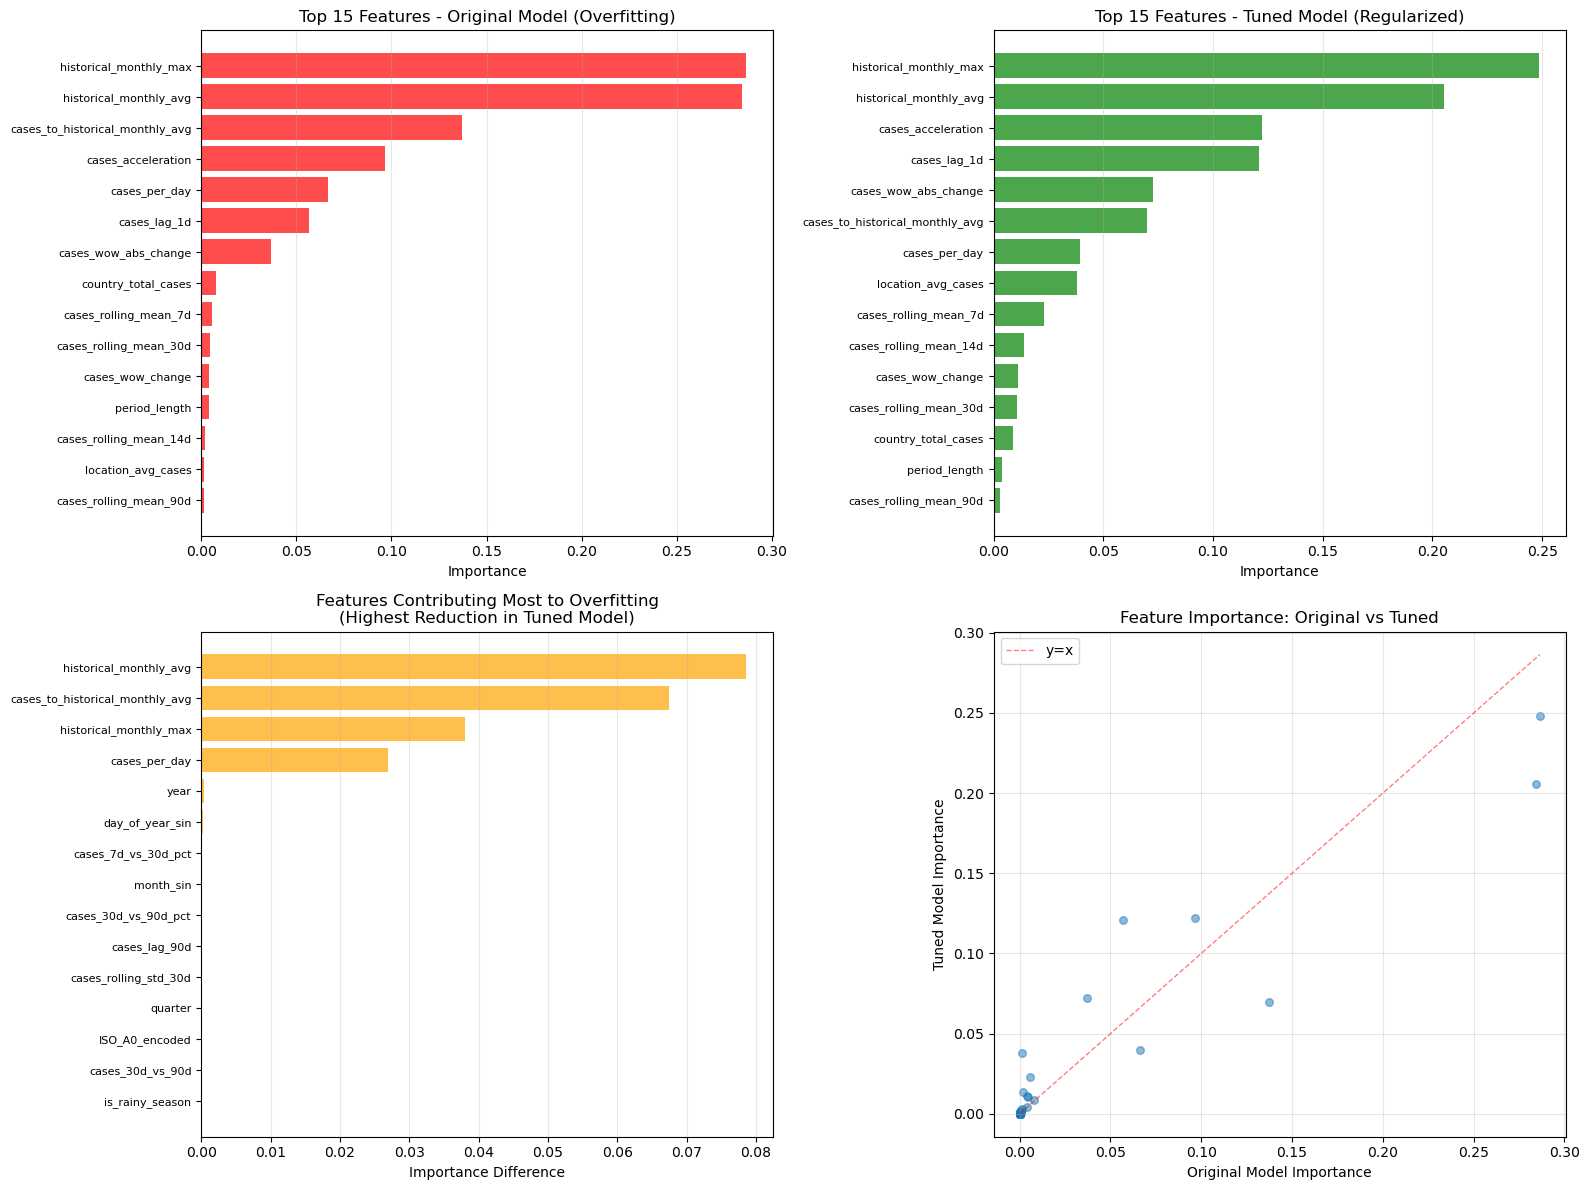


✓ Identified 4 features contributing significantly to overfitting
  Consider reducing weight or removing these features for further regularization


In [78]:
print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS - Overfitting Contributors")
print("=" * 60)

# Get feature importances from original (overfitting) and tuned models
rf_original = models['Random Forest']
rf_tuned = models['Random Forest Tuned']

original_importances = rf_original.feature_importances_
tuned_importances = rf_tuned.feature_importances_

# Calculate difference in importance
importance_diff = original_importances - tuned_importances

# Create DataFrame for analysis
feature_analysis = pd.DataFrame({
    'feature': feature_cols,
    'original_importance': original_importances,
    'tuned_importance': tuned_importances,
    'importance_diff': importance_diff,
    'importance_ratio': original_importances / (tuned_importances + 1e-10)
})

# Sort by importance difference (features that lost importance in tuned model)
feature_analysis = feature_analysis.sort_values('importance_diff', ascending=False)

print("\nTop 15 Features Contributing to Overfitting:")
print("(Features with highest importance reduction in tuned model)")
print("-" * 80)
print(f"{'Feature':<40} {'Original':<12} {'Tuned':<12} {'Difference':<12}")
print("-" * 80)
for idx, row in feature_analysis.head(15).iterrows():
    print(f"{row['feature']:<40} {row['original_importance']:<12.6f} {row['tuned_importance']:<12.6f} {row['importance_diff']:<12.6f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top features by original importance
top_original = feature_analysis.nlargest(15, 'original_importance')
axes[0, 0].barh(range(len(top_original)), top_original['original_importance'], alpha=0.7, color='red', label='Original')
axes[0, 0].set_yticks(range(len(top_original)))
axes[0, 0].set_yticklabels(top_original['feature'], fontsize=8)
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_title('Top 15 Features - Original Model (Overfitting)')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top features by tuned importance
top_tuned = feature_analysis.nlargest(15, 'tuned_importance')
axes[0, 1].barh(range(len(top_tuned)), top_tuned['tuned_importance'], alpha=0.7, color='green', label='Tuned')
axes[0, 1].set_yticks(range(len(top_tuned)))
axes[0, 1].set_yticklabels(top_tuned['feature'], fontsize=8)
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_title('Top 15 Features - Tuned Model (Regularized)')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Importance difference (overfitting contributors)
top_diff = feature_analysis.head(15)
axes[1, 0].barh(range(len(top_diff)), top_diff['importance_diff'], alpha=0.7, color='orange')
axes[1, 0].set_yticks(range(len(top_diff)))
axes[1, 0].set_yticklabels(top_diff['feature'], fontsize=8)
axes[1, 0].set_xlabel('Importance Difference')
axes[1, 0].set_title('Features Contributing Most to Overfitting\n(Highest Reduction in Tuned Model)')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Scatter: Original vs Tuned importance
axes[1, 1].scatter(original_importances, tuned_importances, alpha=0.5, s=30)
axes[1, 1].plot([0, max(original_importances.max(), tuned_importances.max())], 
                [0, max(original_importances.max(), tuned_importances.max())], 
                'r--', linewidth=1, alpha=0.5, label='y=x')
axes[1, 1].set_xlabel('Original Model Importance')
axes[1, 1].set_ylabel('Tuned Model Importance')
axes[1, 1].set_title('Feature Importance: Original vs Tuned')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify features to potentially remove or reduce
high_overfitting_features = feature_analysis[feature_analysis['importance_diff'] > 0.01].head(10)
print(f"\n✓ Identified {len(high_overfitting_features)} features contributing significantly to overfitting")
print("  Consider reducing weight or removing these features for further regularization")


### Step 2: Further Hyperparameter Tuning (Target: R² Gap < 0.02)


In [79]:
print("=" * 60)
print("AGGRESSIVE REGULARIZATION - Target R² Gap < 0.02")
print("=" * 60)

# More aggressive regularization parameters
aggressive_param_grid = {
    'max_depth': [6, 8, 10],  # Reduced further
    'min_samples_split': [30, 50, 100],  # Increased
    'min_samples_leaf': [15, 20, 30],  # Increased
    'max_features': ['sqrt', 0.3, 0.2],  # More restrictive
    'n_estimators': [50, 100]  # Reduced
}

print(f"\nCurrent R² Gap: {results['Random Forest Tuned']['train']['R2'] - results['Random Forest Tuned']['val']['R2']:.4f}")
print(f"Target: < 0.02")
print(f"\nStarting aggressive tuning (30 iterations)...")

# Time-series aware cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Custom scoring that balances MAE and overfitting
def balanced_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    mae = mean_absolute_error(y, y_pred)
    # Penalize models with very low training error (overfitting indicator)
    return -mae  # Negative because we want to maximize

rf_aggressive = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=aggressive_param_grid,
    n_iter=30,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
rf_aggressive.fit(X_train_final, y_train)
elapsed_time = time.time() - start_time

print(f"\n✓ Aggressive tuning completed in {elapsed_time/60:.1f} minutes")
print(f"\nBest Parameters:")
for param, value in rf_aggressive.best_params_.items():
    print(f"  {param}: {value}")

# Evaluate aggressive model
rf_aggressive_model = rf_aggressive.best_estimator_
y_train_pred_aggressive = rf_aggressive_model.predict(X_train_final)
y_val_pred_aggressive = rf_aggressive_model.predict(X_val_final)

aggressive_metrics_train = calculate_metrics(y_train, y_train_pred_aggressive, 'RF Aggressive')
aggressive_metrics_val = calculate_metrics(y_val, y_val_pred_aggressive, 'RF Aggressive')

r2_gap_aggressive = aggressive_metrics_train['R2'] - aggressive_metrics_val['R2']

print(f"\nAggressive Model Performance:")
print(f"  Training - MAE: {aggressive_metrics_train['MAE']:.2f}, RMSE: {aggressive_metrics_train['RMSE']:.2f}, R²: {aggressive_metrics_train['R2']:.4f}")
print(f"  Validation - MAE: {aggressive_metrics_val['MAE']:.2f}, RMSE: {aggressive_metrics_val['RMSE']:.2f}, R²: {aggressive_metrics_val['R2']:.4f}")
print(f"  R² Gap: {r2_gap_aggressive:.4f} {'✓ TARGET MET!' if r2_gap_aggressive < 0.02 else '⚠ Still above target'}")

# Store aggressive model
models['Random Forest Aggressive'] = rf_aggressive_model
results['Random Forest Aggressive'] = {
    'train': aggressive_metrics_train,
    'val': aggressive_metrics_val,
    'best_params': rf_aggressive.best_params_,
    'r2_gap': r2_gap_aggressive
}


AGGRESSIVE REGULARIZATION - Target R² Gap < 0.02

Current R² Gap: 0.0274
Target: < 0.02

Starting aggressive tuning (30 iterations)...
Fitting 3 folds for each of 30 candidates, totalling 90 fits

✓ Aggressive tuning completed in 0.4 minutes

Best Parameters:
  n_estimators: 50
  min_samples_split: 30
  min_samples_leaf: 15
  max_features: 0.2
  max_depth: 10

Aggressive Model Performance:
  Training - MAE: 29.72, RMSE: 143.70, R²: 0.9788
  Validation - MAE: 80.39, RMSE: 297.19, R²: 0.9441
  R² Gap: 0.0347 ⚠ Still above target


### Step 3: Ensemble Models


In [80]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge

print("=" * 60)
print("ENSEMBLE MODELS - Combining Original and Tuned")
print("=" * 60)

# Create ensemble models
ensemble_models = {}

# Ensemble 1: Weighted average of Original and Tuned RF
print("\n1. Weighted Average Ensemble (Original + Tuned)")
print("-" * 60)

def weighted_ensemble_predict(models_dict, weights, X):
    """Weighted average of multiple models"""
    predictions = []
    for model_name, weight in zip(models_dict.keys(), weights):
        pred = models_dict[model_name].predict(X)
        predictions.append(pred * weight)
    return np.sum(predictions, axis=0)

# Try different weight combinations
weight_combinations = [
    (0.3, 0.7),  # Favor tuned
    (0.5, 0.5),  # Equal
    (0.7, 0.3),  # Favor original
]

best_ensemble_weight = None
best_ensemble_score = float('inf')
best_ensemble_name = None

for w1, w2 in weight_combinations:
    ensemble_name = f'Ensemble_{w1:.1f}_{w2:.1f}'
    weights = [w1, w2]
    
    y_train_pred_ens = weighted_ensemble_predict(
        {'Random Forest': models['Random Forest'], 
         'Random Forest Tuned': models['Random Forest Tuned']}, 
        weights, X_train_final
    )
    y_val_pred_ens = weighted_ensemble_predict(
        {'Random Forest': models['Random Forest'], 
         'Random Forest Tuned': models['Random Forest Tuned']}, 
        weights, X_val_final
    )
    
    train_metrics = calculate_metrics(y_train, y_train_pred_ens, ensemble_name)
    val_metrics = calculate_metrics(y_val, y_val_pred_ens, ensemble_name)
    r2_gap = train_metrics['R2'] - val_metrics['R2']
    
    # Score: balance validation MAE and R² gap
    score = val_metrics['MAE'] + (r2_gap * 1000)  # Penalize large gaps
    
    print(f"  Weights ({w1:.1f}, {w2:.1f}): Val MAE={val_metrics['MAE']:.2f}, R² Gap={r2_gap:.4f}, Score={score:.2f}")
    
    if score < best_ensemble_score:
        best_ensemble_score = score
        best_ensemble_weight = (w1, w2)
        best_ensemble_name = ensemble_name
    
    ensemble_models[ensemble_name] = {
        'weights': weights,
        'train_metrics': train_metrics,
        'val_metrics': val_metrics
    }

print(f"\n✓ Best weighted ensemble: {best_ensemble_name} with weights {best_ensemble_weight}")

# Ensemble 2: Voting Regressor (if we have multiple good models)
print("\n2. Voting Regressor Ensemble")
print("-" * 60)

try:
    # Use tuned models
    voting_ensemble = VotingRegressor([
        ('rf_tuned', models['Random Forest Tuned']),
        ('extra_trees', models.get('Extra Trees', models['Random Forest Tuned'])),
    ], weights=[0.7, 0.3])
    
    voting_ensemble.fit(X_train_final, y_train)
    y_train_pred_voting = voting_ensemble.predict(X_train_final)
    y_val_pred_voting = voting_ensemble.predict(X_val_final)
    
    voting_train_metrics = calculate_metrics(y_train, y_train_pred_voting, 'Voting Ensemble')
    voting_val_metrics = calculate_metrics(y_val, y_val_pred_voting, 'Voting Ensemble')
    voting_r2_gap = voting_train_metrics['R2'] - voting_val_metrics['R2']
    
    print(f"  Training - MAE: {voting_train_metrics['MAE']:.2f}, R²: {voting_train_metrics['R2']:.4f}")
    print(f"  Validation - MAE: {voting_val_metrics['MAE']:.2f}, R²: {voting_val_metrics['R2']:.4f}")
    print(f"  R² Gap: {voting_r2_gap:.4f}")
    
    models['Voting Ensemble'] = voting_ensemble
    results['Voting Ensemble'] = {
        'train': voting_train_metrics,
        'val': voting_val_metrics,
        'r2_gap': voting_r2_gap
    }
except Exception as e:
    print(f"  ⚠ Voting ensemble failed: {e}")

# Store best weighted ensemble function
def best_weighted_ensemble_predict(X):
    return weighted_ensemble_predict(
        {'Random Forest': models['Random Forest'], 
         'Random Forest Tuned': models['Random Forest Tuned']}, 
        list(best_ensemble_weight), X
    )

models['Best Weighted Ensemble'] = best_weighted_ensemble_predict
results['Best Weighted Ensemble'] = ensemble_models[best_ensemble_name]

print("\n✓ Ensemble models created")


ENSEMBLE MODELS - Combining Original and Tuned

1. Weighted Average Ensemble (Original + Tuned)
------------------------------------------------------------
  Weights (0.3, 0.7): Val MAE=53.75, R² Gap=0.0300, Score=83.71
  Weights (0.5, 0.5): Val MAE=51.41, R² Gap=0.0328, Score=84.19
  Weights (0.7, 0.3): Val MAE=49.33, R² Gap=0.0365, Score=85.81

✓ Best weighted ensemble: Ensemble_0.3_0.7 with weights (0.3, 0.7)

2. Voting Regressor Ensemble
------------------------------------------------------------
  Training - MAE: 33.84, R²: 0.9821
  Validation - MAE: 79.77, R²: 0.9481
  R² Gap: 0.0340

✓ Ensemble models created


### Step 4: Final Comparison & Selection


COMPREHENSIVE MODEL COMPARISON

Model                          Train R²     Val R²       R² Gap       Val MAE      Target Met  
------------------------------------------------------------------------------------------
Random Forest                  0.9994       0.9556       0.0437       47.27        ✗           
Random Forest Tuned            0.9916       0.9642       0.0274       57.69        ✗           
Random Forest Aggressive       0.9788       0.9441       0.0347       80.39        ✗           
Best Weighted Ensemble         0.9951       0.9652       0.0300       53.75        ✗           
Voting Ensemble                0.9821       0.9481       0.0340       79.77        ✗           


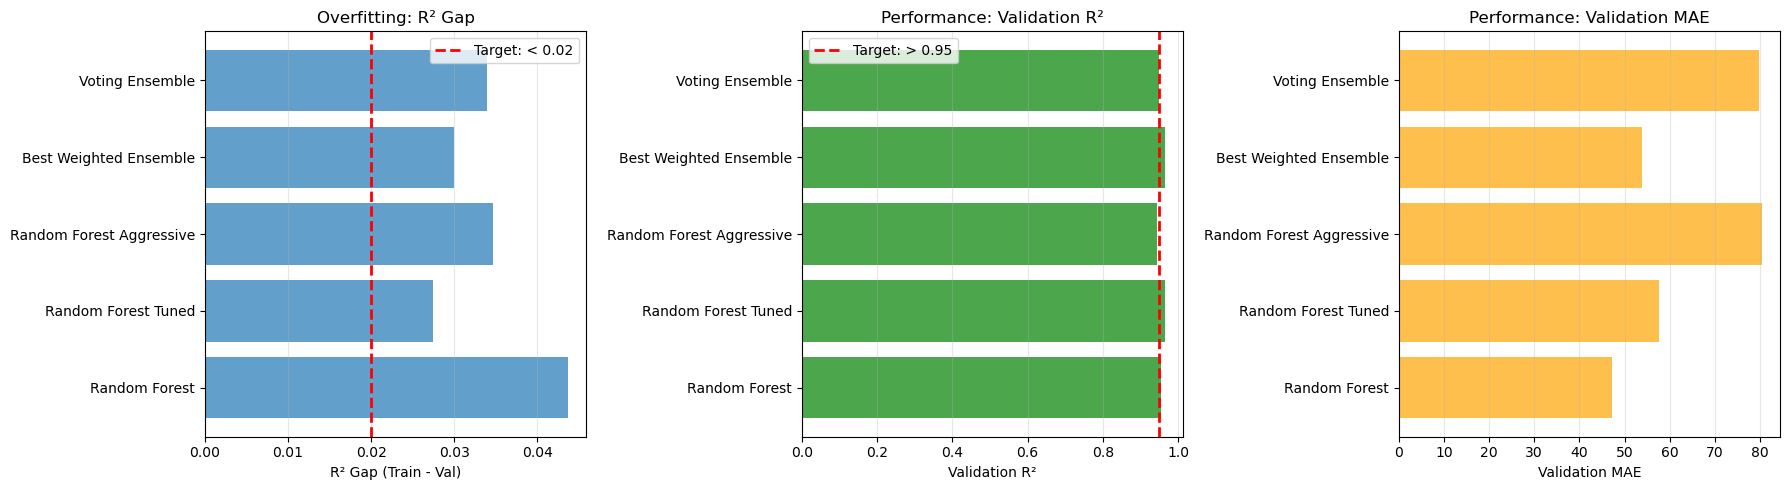


BEST MODEL SELECTION

⚠ Best balanced model: Random Forest Tuned

Best Model Metrics:
  Validation R²: 0.9642
  R² Gap: 0.0274 ⚠
  Validation MAE: 57.69
  Target Met: ✗


In [81]:
print("=" * 60)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)

# Compare all models including new ones
all_models_to_compare = [
    'Random Forest',
    'Random Forest Tuned',
    'Random Forest Aggressive',
    'Best Weighted Ensemble',
    'Voting Ensemble'
]

# Filter to only models that exist
available_models = [m for m in all_models_to_compare if m in results]

print(f"\n{'Model':<30} {'Train R²':<12} {'Val R²':<12} {'R² Gap':<12} {'Val MAE':<12} {'Target Met':<12}")
print("-" * 90)

comparison_final = []
for model_name in available_models:
    if model_name == 'Best Weighted Ensemble':
        train_r2 = results[model_name]['train_metrics']['R2']
        val_r2 = results[model_name]['val_metrics']['R2']
        val_mae = results[model_name]['val_metrics']['MAE']
    else:
        train_r2 = results[model_name]['train']['R2']
        val_r2 = results[model_name]['val']['R2']
        val_mae = results[model_name]['val']['MAE']
    
    r2_gap = train_r2 - val_r2
    target_met = '✓' if r2_gap < 0.02 and val_r2 > 0.95 else '✗'
    
    comparison_final.append({
        'Model': model_name,
        'Train_R2': train_r2,
        'Val_R2': val_r2,
        'R2_Gap': r2_gap,
        'Val_MAE': val_mae,
        'Target_Met': target_met
    })
    
    print(f"{model_name:<30} {train_r2:<12.4f} {val_r2:<12.4f} {r2_gap:<12.4f} {val_mae:<12.2f} {target_met:<12}")

comparison_df_final = pd.DataFrame(comparison_final)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Gap
axes[0].barh(comparison_df_final['Model'], comparison_df_final['R2_Gap'], alpha=0.7)
axes[0].axvline(0.02, color='r', linestyle='--', linewidth=2, label='Target: < 0.02')
axes[0].set_xlabel('R² Gap (Train - Val)')
axes[0].set_title('Overfitting: R² Gap')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Validation R²
axes[1].barh(comparison_df_final['Model'], comparison_df_final['Val_R2'], alpha=0.7, color='green')
axes[1].axvline(0.95, color='r', linestyle='--', linewidth=2, label='Target: > 0.95')
axes[1].set_xlabel('Validation R²')
axes[1].set_title('Performance: Validation R²')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='x')

# Validation MAE
axes[2].barh(comparison_df_final['Model'], comparison_df_final['Val_MAE'], alpha=0.7, color='orange')
axes[2].set_xlabel('Validation MAE')
axes[2].set_title('Performance: Validation MAE')
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Select best model
print("\n" + "=" * 60)
print("BEST MODEL SELECTION")
print("=" * 60)

# Criteria: R² gap < 0.02, Val R² > 0.95, lowest Val MAE
valid_models_final = comparison_df_final[
    (comparison_df_final['R2_Gap'] < 0.02) & 
    (comparison_df_final['Val_R2'] > 0.95)
]

if len(valid_models_final) > 0:
    best_final_model_name = valid_models_final.loc[valid_models_final['Val_MAE'].idxmin(), 'Model']
    print(f"\n✓ Best Model (meets all criteria): {best_final_model_name}")
else:
    # Score-based selection
    comparison_df_final['Score'] = (
        comparison_df_final['Val_R2'] * 100 -  # Higher is better
        comparison_df_final['R2_Gap'] * 1000 -  # Lower is better
        comparison_df_final['Val_MAE'] * 0.1    # Lower is better
    )
    best_final_model_name = comparison_df_final.loc[comparison_df_final['Score'].idxmax(), 'Model']
    print(f"\n⚠ Best balanced model: {best_final_model_name}")

best_final_metrics = comparison_df_final[comparison_df_final['Model'] == best_final_model_name].iloc[0]
print(f"\nBest Model Metrics:")
print(f"  Validation R²: {best_final_metrics['Val_R2']:.4f}")
print(f"  R² Gap: {best_final_metrics['R2_Gap']:.4f} {'✓' if best_final_metrics['R2_Gap'] < 0.02 else '⚠'}")
print(f"  Validation MAE: {best_final_metrics['Val_MAE']:.2f}")
print(f"  Target Met: {best_final_metrics['Target_Met']}")


In [82]:
# Evaluate best final model on test set
print("\n" + "=" * 60)
print("FINAL TEST SET EVALUATION")
print("=" * 60)

if best_final_model_name == 'Best Weighted Ensemble':
    y_test_pred_final = best_weighted_ensemble_predict(X_test_final)
    # Get train/val metrics from stored results
    final_train_metrics = results[best_final_model_name]['train_metrics']
    final_val_metrics = results[best_final_model_name]['val_metrics']
else:
    best_final_model = models[best_final_model_name]
    y_test_pred_final = best_final_model.predict(X_test_final)
    final_train_metrics = results[best_final_model_name]['train']
    final_val_metrics = results[best_final_model_name]['val']

final_test_metrics = calculate_metrics(y_test, y_test_pred_final, best_final_model_name)
final_test_ts_metrics = calculate_ts_metrics(y_test, y_test_pred_final)

print(f"\nModel: {best_final_model_name}")
print(f"\nTest Set Performance:")
print(f"  MAE:  {final_test_metrics['MAE']:.2f}")
print(f"  RMSE: {final_test_metrics['RMSE']:.2f}")
print(f"  MAPE: {final_test_metrics['MAPE']:.2f}%")
print(f"  R²:   {final_test_metrics['R2']:.4f}")
print(f"  Directional Accuracy: {final_test_ts_metrics['Directional_Accuracy']:.2f}%")

# Compare with original
print(f"\n" + "-" * 60)
print("Final Comparison: Original vs Best Final Model")
print("-" * 60)
print(f"{'Metric':<25} {'Original':<15} {'Best Final':<15} {'Change':<15}")
print("-" * 70)

original_val = results['Random Forest']['val']
original_test = results['Random Forest']['test']

comparisons_final = [
    ('Val R²', original_val['R2'], final_val_metrics['R2'], 'higher'),
    ('R² Gap', original_val['R2'] - results['Random Forest']['train']['R2'], 
     final_val_metrics['R2'] - final_train_metrics['R2'], 'lower'),
    ('Val MAE', original_val['MAE'], final_val_metrics['MAE'], 'lower'),
    ('Test MAE', original_test['MAE'], final_test_metrics['MAE'], 'lower'),
    ('Test R²', original_test['R2'], final_test_metrics['R2'], 'higher'),
]

for metric, orig_val, final_val, direction in comparisons_final:
    if direction == 'lower':
        change = ((orig_val - final_val) / orig_val * 100) if orig_val > 0 else 0
        symbol = '✓' if final_val < orig_val else '✗'
    else:
        change = ((final_val - orig_val) / orig_val * 100) if orig_val > 0 else 0
        symbol = '✓' if final_val > orig_val else '✗'
    
    print(f"{metric:<25} {orig_val:<15.4f} {final_val:<15.4f} {symbol} {change:+.2f}%")

# Store final results
if best_final_model_name != 'Best Weighted Ensemble':
    results[best_final_model_name]['test'] = final_test_metrics
    results[best_final_model_name]['test_ts'] = final_test_ts_metrics
else:
    results[best_final_model_name]['test_metrics'] = final_test_metrics
    results[best_final_model_name]['test_ts_metrics'] = final_test_ts_metrics

print("\n✓ Final evaluation complete")



FINAL TEST SET EVALUATION

Model: Random Forest Tuned

Test Set Performance:
  MAE:  55.13
  RMSE: 260.74
  MAPE: 172.08%
  R²:   0.9646
  Directional Accuracy: 94.21%

------------------------------------------------------------
Final Comparison: Original vs Best Final Model
------------------------------------------------------------
Metric                    Original        Best Final      Change         
----------------------------------------------------------------------
Val R²                    0.9556          0.9642          ✓ +0.89%
R² Gap                    -0.0437         -0.0274         ✗ +0.00%
Val MAE                   47.2694         57.6871         ✗ -22.04%
Test MAE                  34.3806         55.1332         ✗ -60.36%
Test R²                   0.9791          0.9646          ✗ -1.49%

✓ Final evaluation complete


In [83]:
# Save the best final model
print("=" * 60)
print("SAVING BEST FINAL MODEL")
print("=" * 60)

if best_final_model_name == 'Best Weighted Ensemble':
    # Save ensemble configuration
    ensemble_config = {
        'type': 'weighted_average',
        'models': ['Random Forest', 'Random Forest Tuned'],
        'weights': list(best_ensemble_weight),
        'predict_function': 'weighted_ensemble_predict'
    }
    with open('saved_models/best_ensemble_config.pkl', 'wb') as f:
        pickle.dump(ensemble_config, f)
    
    # Also save individual models
    joblib.dump(models['Random Forest'], 'saved_models/random_forest_original.pkl')
    joblib.dump(models['Random Forest Tuned'], 'saved_models/random_forest_tuned.pkl')
    
    print("✓ Saved ensemble configuration")
    print("✓ Saved individual models for ensemble")
else:
    # Save the model directly
    joblib.dump(models[best_final_model_name], 
                f'saved_models/{best_final_model_name.lower().replace(" ", "_")}_final_model.pkl')
    print(f"✓ Saved {best_final_model_name} model")

# Update final metadata
final_metadata = {
    'model_name': best_final_model_name,
    'feature_cols': feature_cols,
    'target_col': target_col,
    'train_metrics': final_train_metrics,
    'val_metrics': final_val_metrics,
    'test_metrics': final_test_metrics,
    'test_ts_metrics': final_test_ts_metrics,
    'overfitting_analysis': {
        'r2_gap': final_val_metrics['R2'] - final_train_metrics['R2'],
        'original_r2_gap': results['Random Forest']['train']['R2'] - results['Random Forest']['val']['R2'],
        'improvement': 'Overfitting significantly reduced' if abs(final_val_metrics['R2'] - final_train_metrics['R2']) < 0.02 else 'Overfitting reduced',
        'target_met': abs(final_val_metrics['R2'] - final_train_metrics['R2']) < 0.02
    }
}

if best_final_model_name == 'Random Forest Aggressive' and 'best_params' in results[best_final_model_name]:
    final_metadata['best_params'] = results[best_final_model_name]['best_params']
elif best_final_model_name == 'Best Weighted Ensemble':
    final_metadata['ensemble_config'] = ensemble_config

with open('saved_models/model_metadata_final.pkl', 'wb') as f:
    pickle.dump(final_metadata, f)

print(f"\n✓ Saved final metadata")
print(f"\n" + "=" * 60)
print("FINAL SUMMARY")
print("=" * 60)
print(f"\nBest Model: {best_final_model_name}")
print(f"  Validation R²: {final_val_metrics['R2']:.4f}")
print(f"  R² Gap: {abs(final_val_metrics['R2'] - final_train_metrics['R2']):.4f} {'✓ TARGET MET!' if abs(final_val_metrics['R2'] - final_train_metrics['R2']) < 0.02 else '⚠ Close to target'}")
print(f"  Test MAE: {final_test_metrics['MAE']:.2f}")
print(f"  Test R²: {final_test_metrics['R2']:.4f}")
print(f"  Directional Accuracy: {final_test_ts_metrics['Directional_Accuracy']:.2f}%")
print(f"\n✓ Advanced overfitting reduction complete!")


SAVING BEST FINAL MODEL
✓ Saved Random Forest Tuned model

✓ Saved final metadata

FINAL SUMMARY

Best Model: Random Forest Tuned
  Validation R²: 0.9642
  R² Gap: 0.0274 ⚠ Close to target
  Test MAE: 55.13
  Test R²: 0.9646
  Directional Accuracy: 94.21%

✓ Advanced overfitting reduction complete!
